In [2]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats
import math
import h5py

plt.rcParams["figure.figsize"] = (20,15)

# Initial Setups
These steps are done to import data from the provided file into an array.

In [375]:
hf = h5py.File('gammaray_lab4.h5', 'r')
hf

<HDF5 file "gammaray_lab4.h5" (mode r)>

In [376]:
hf.keys()

<KeysViewHDF5 ['data']>

In [377]:
data = np.array(hf.get('data'))
data

array([[9.40680016e+08, 9.40680016e+08, 9.40680016e+08, ...,
        9.43272016e+08, 9.43272016e+08, 9.43272016e+08],
       [3.15000000e+02, 3.15007112e+02, 3.15014225e+02, ...,
        3.45319109e+02, 3.45326221e+02, 3.45333333e+02],
       [4.50000000e+01, 4.50066667e+01, 4.50133333e+01, ...,
        4.49866667e+01, 4.49933333e+01, 4.50000000e+01],
       [1.00000000e+01, 8.00000000e+00, 7.00000000e+00, ...,
        8.00000000e+00, 1.10000000e+01, 1.20000000e+01]])

In [378]:
data[:,0]

array([9.40680016e+08, 3.15000000e+02, 4.50000000e+01, 1.00000000e+01])

In [379]:
hf.close()

We close the file after obtaining the data we needed.

# Problem 1

In [380]:
len(data[0,:])

25920001

Our data has 4 columns and 25,920,001 rows.
<br>

The columns are :
<br> **Time** (GPS Seconds)
<br> **Solar Phase** (Degrees)
<br> **Earth Longtitude** (Degrees)
<br> **Particle Counts**

## 1)

We shall plot the Particle Counts against each of the first 3 columns on 2D histograms to see the relationship between variables:
<br> We will weight the histogram with Particle Counts since multiple counts = multiple data for the same Time/Solar Phase/Earth Longitude.
<br> But first, we will find the max and min of each parameter so we can adjust out bins accordingly.

### Time:

In [37]:
print(max(data[0,:]))
print(min(data[0,:]))

943272016.0
940680016.0


### Solar Phase:

In [39]:
print(max(data[1,:]))
print(min(data[1,:]))

359.9999986496987
6.9941888796165586e-06


### Earth Longitude:

In [40]:
print(max(data[2,:]))
print(min(data[2,:]))

359.9933333317458
0.0


### Particle Counts:

In [42]:
print(max(data[3,:]))
print(min(data[3,:]))

30.0
0.0


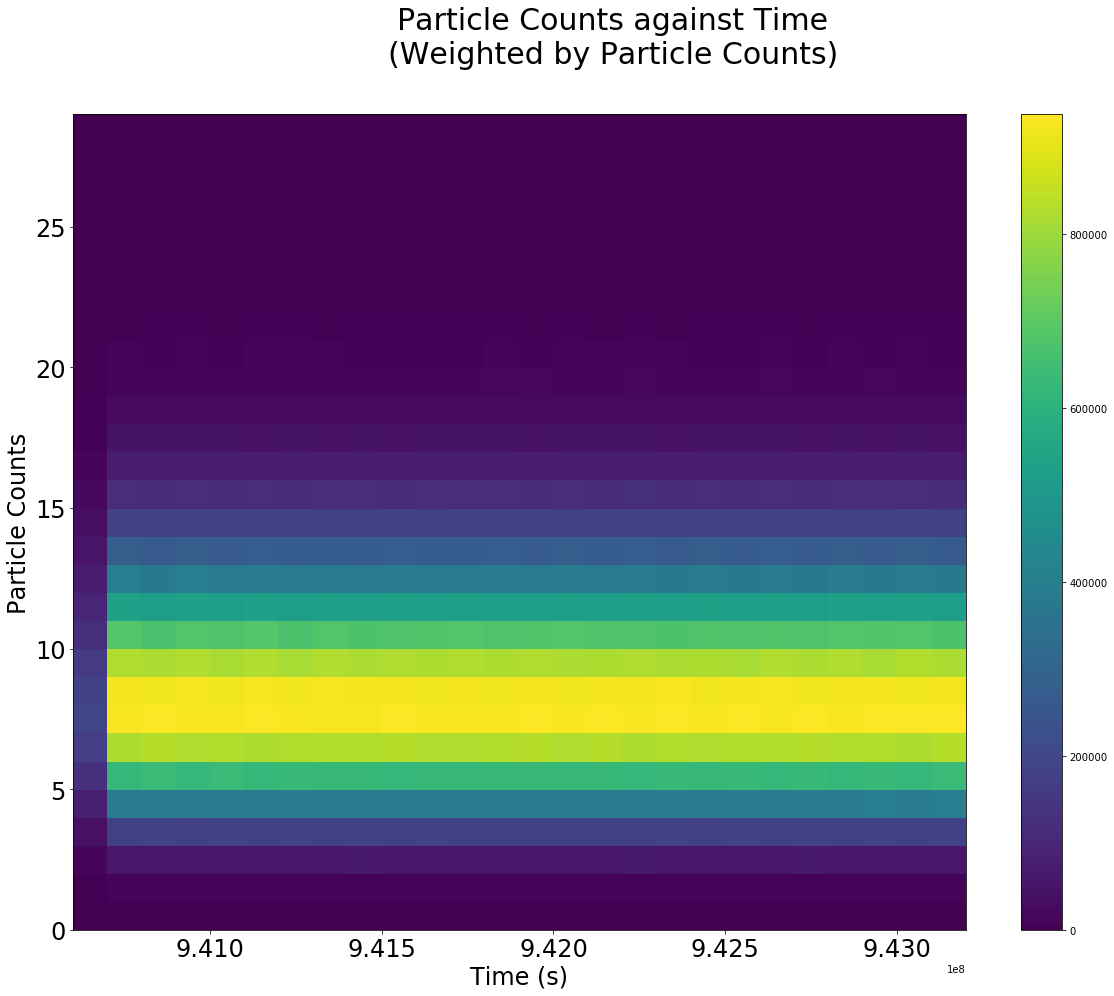

In [427]:
plt.suptitle('Particle Counts against Time\n(Weighted by Particle Counts)', fontsize=30)
plt.xlabel('Time (s)', fontsize = 24)
plt.ylabel('Particle Counts', fontsize = 24)
plt.tick_params(labelsize = 24)
binx = np.arange(9.406e+8,9.433e+8, 0.001e+8)
biny = np.arange(0,30)
pc_vs_time = plt.hist2d(data[0,:], data[3,:],  bins = [binx, biny], weights = data[3,:])
plt.colorbar()

We can observe that most Particle counts are at 8 particles, constant and unrelated to time.

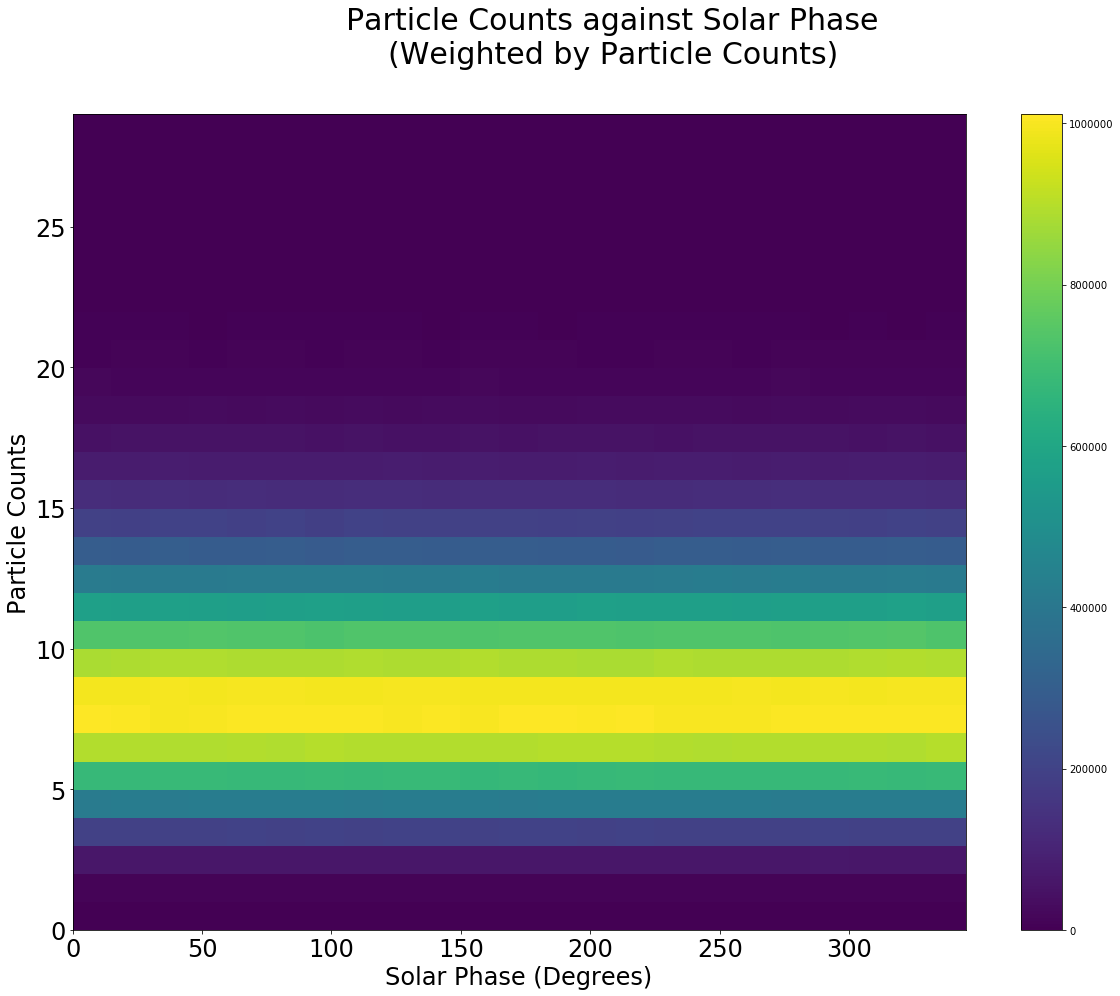

In [428]:
plt.suptitle('Particle Counts against Solar Phase\n(Weighted by Particle Counts)', fontsize=30)
plt.xlabel('Solar Phase (Degrees)', fontsize = 24)
plt.ylabel('Particle Counts', fontsize = 24)
plt.tick_params(labelsize = 24)
binx = np.arange(0, 360, 15)
biny = np.arange(0,30)
pc_vs_sp = plt.hist2d(data[1,:], data[3,:],  bins = [binx, biny], weights = data[3,:])
plt.colorbar()

We can observe that most Particle counts are at 8 particles, constant and unrelated to Solar Phase.

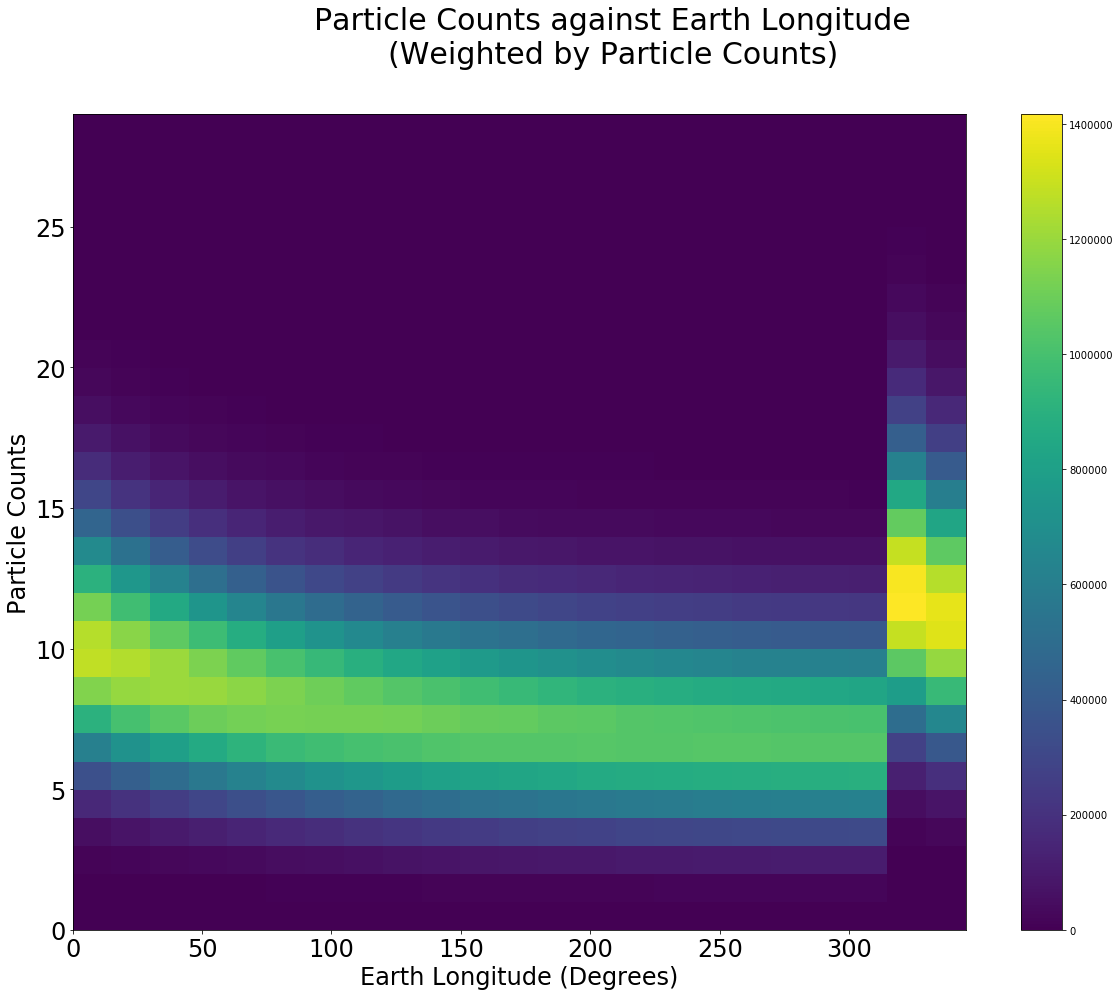

In [429]:
plt.suptitle('Particle Counts against Earth Longitude\n(Weighted by Particle Counts)', fontsize=30)
plt.xlabel('Earth Longitude (Degrees)', fontsize = 24)
plt.ylabel('Particle Counts', fontsize = 24)
plt.tick_params(labelsize = 24)
binx = np.arange(0, 360, 15)
biny = np.arange(0,30)
pc_vs_el = plt.hist2d(data[2,:], data[3,:],  bins = [binx, biny], weights = data[3,:])
plt.colorbar()

There seems to be a relationship between Paricle counts and Earth longitude.
<br> Between $-45^{\circ} <= \theta <= 315^{\circ}$ Particle count decreases with increasing Earth longitude. 

We've finished plotting the Particle Counts in 2D histograms.
Since we did not see bright bins except on or near the brightest line, we can conclude that:

While it's possible that outlier data may exist, they are not large enough in size so that they interfere with the trend of the data. 

[]

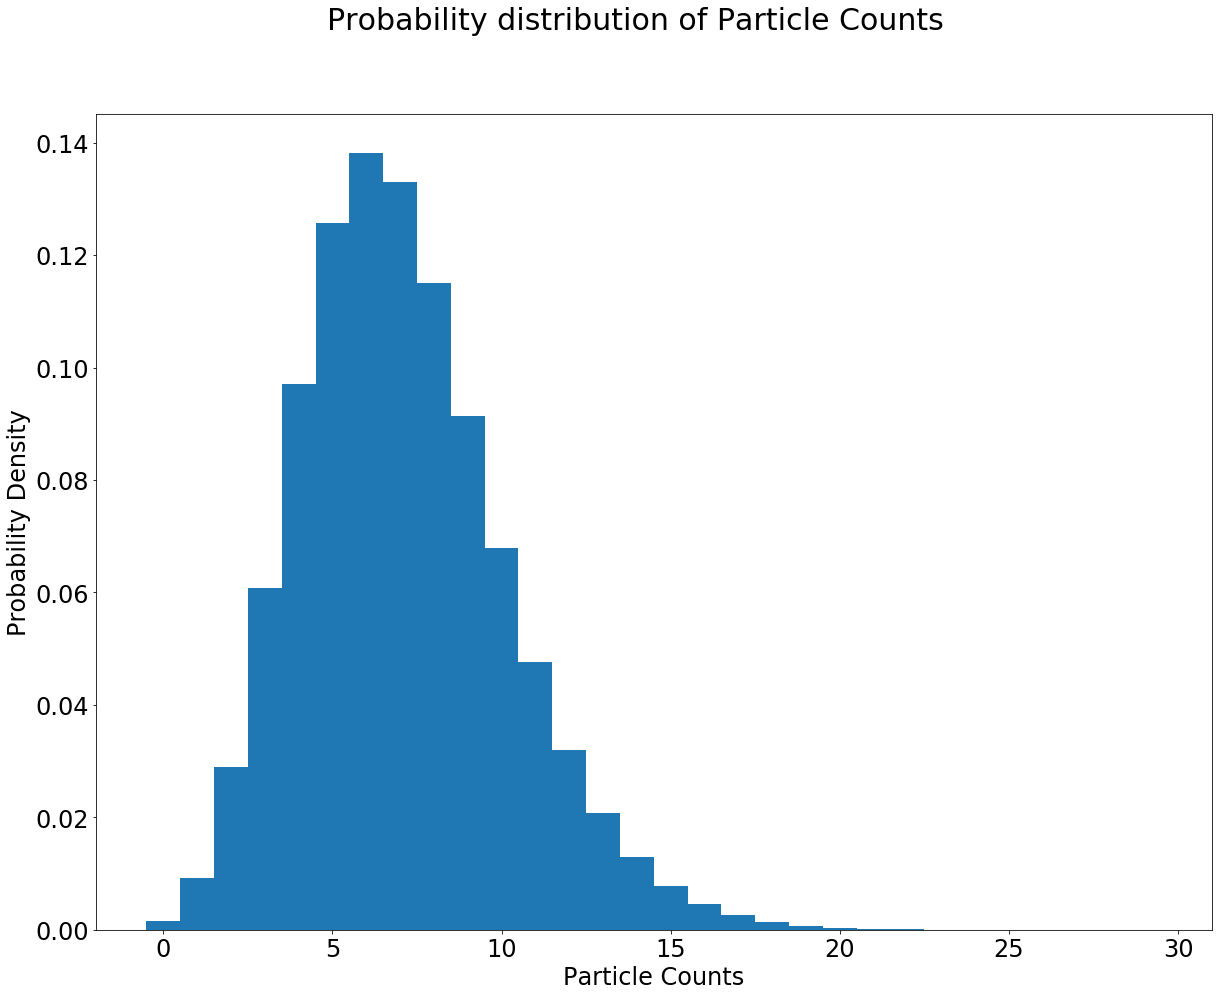

In [384]:
plt.suptitle('Probability distribution of Particle Counts', fontsize=30)
plt.xlabel('Particle Counts', fontsize = 24)
plt.ylabel('Probability Density', fontsize = 24)
plt.tick_params(labelsize = 24)
plt.hist(data[3,:], bins = np.arange(-0.5,30.5), density = True)
plt.plot()

[]

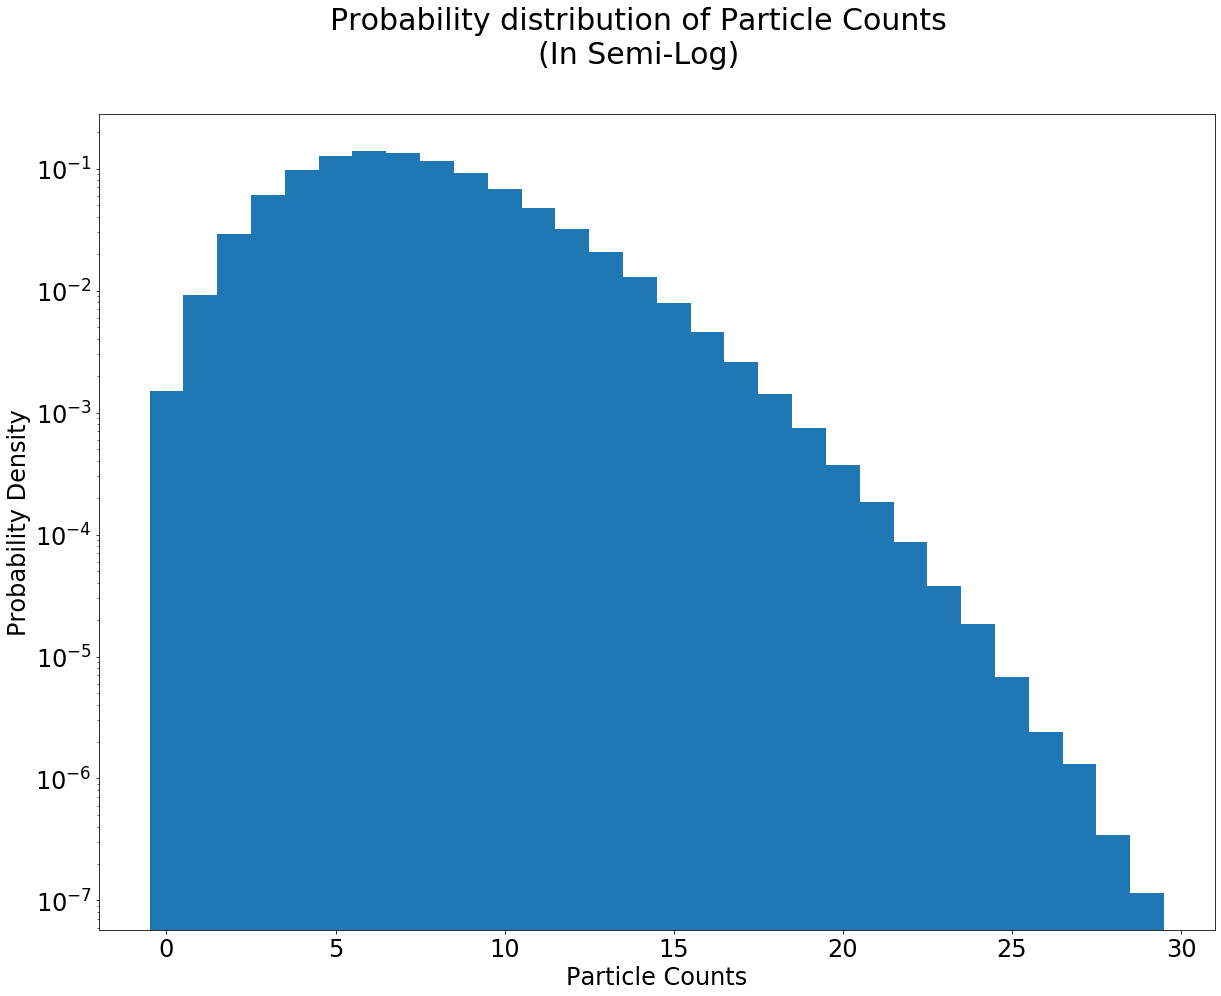

In [385]:
plt.suptitle('Probability distribution of Particle Counts\n(In Semi-Log)', fontsize=30)
plt.xlabel('Particle Counts', fontsize = 24)
plt.ylabel('Probability Density', fontsize = 24)
plt.yscale('log')
plt.tick_params(labelsize = 24)
plt.hist(data[3,:], bins = np.arange(-0.5,30.5), density = True)
plt.plot()

The probability distribution of the Particle Counts appears to be a Poisson Distribution centered at 6.
<br> This would be a good choice to set as our background PDF.

To seek for contamination in the data, we will plot Particle Counts against the 3 parameters respectively, using a scatterplot.
<br>Due to the size of the data we're using every 1000th point.

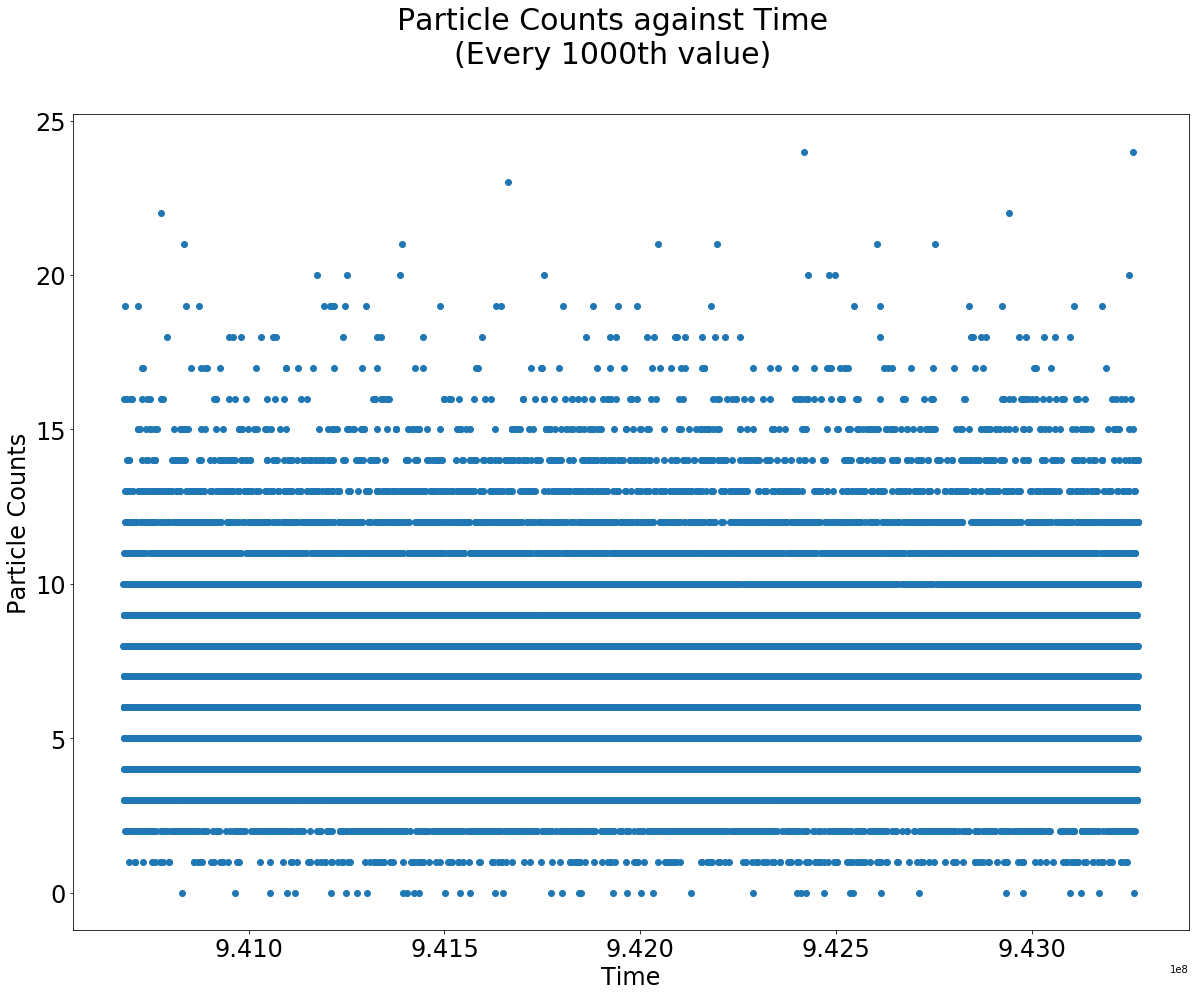

In [386]:
plt.suptitle('Particle Counts against Time\n(Every 1000th value)', fontsize=30)
plt.xlabel('Time', fontsize = 24)
plt.ylabel('Particle Counts', fontsize = 24)
plt.tick_params(labelsize = 24)
plt.scatter(data[0,0::1000], data[3,0::1000])

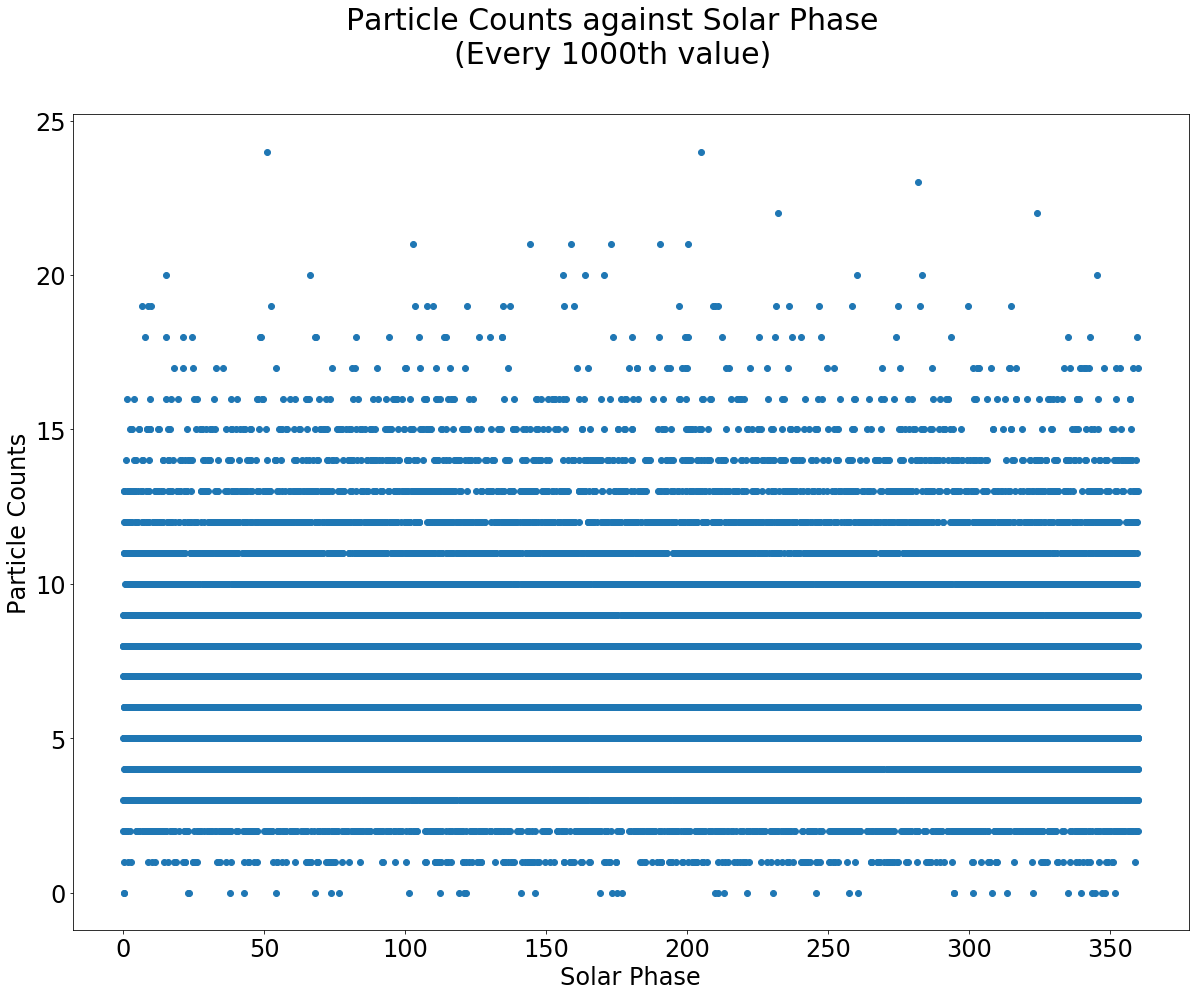

In [387]:
plt.suptitle('Particle Counts against Solar Phase\n(Every 1000th value)', fontsize=30)
plt.xlabel('Solar Phase', fontsize = 24)
plt.ylabel('Particle Counts', fontsize = 24)
plt.tick_params(labelsize = 24)
plt.scatter(data[1,0::1000], data[3,0::1000])

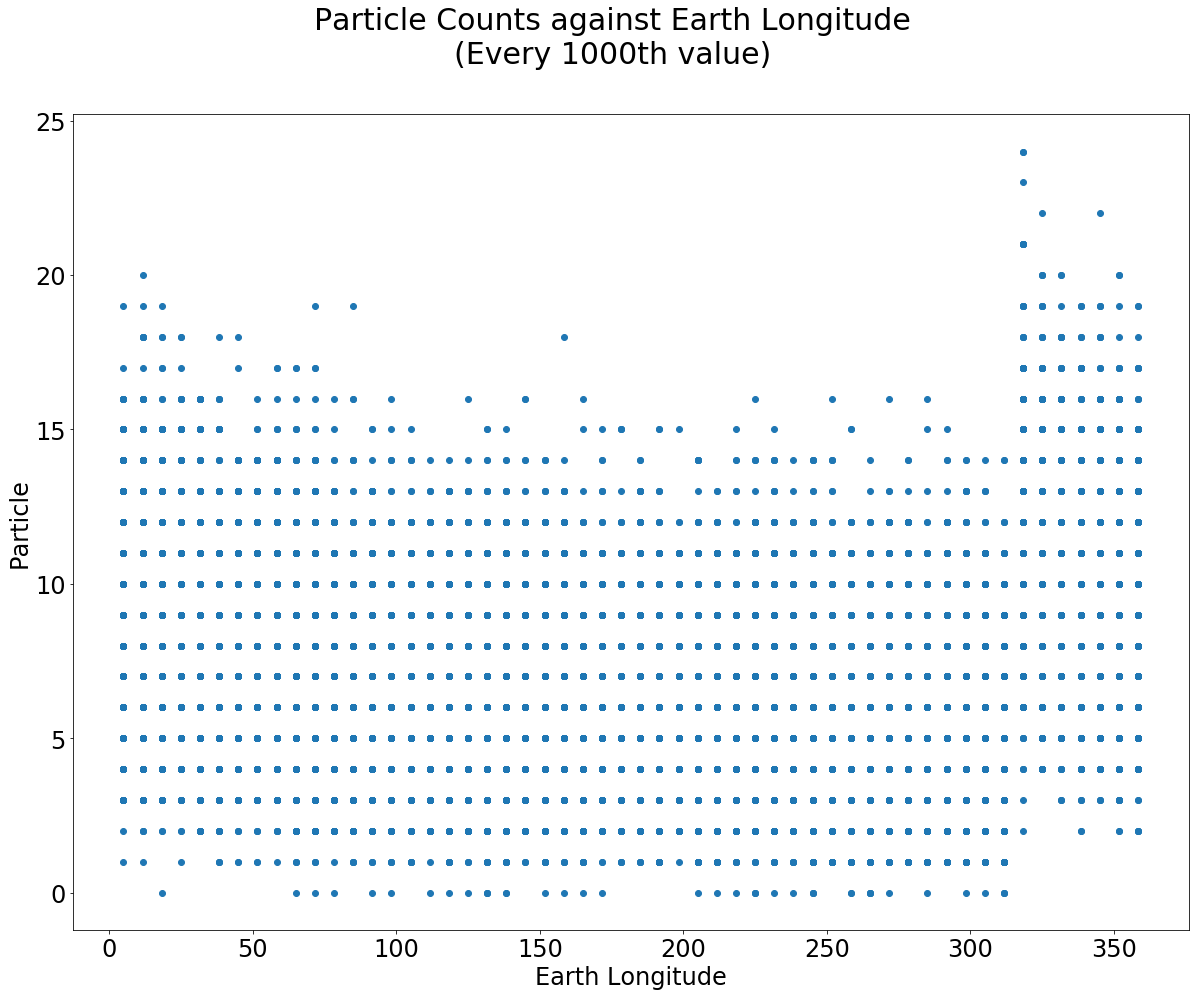

In [388]:
plt.suptitle('Particle Counts against Earth Longitude\n(Every 1000th value)', fontsize=30)
plt.xlabel('Earth Longitude', fontsize = 24)
plt.ylabel('Particle', fontsize = 24)
plt.tick_params(labelsize = 24)
plt.scatter(data[2,0::1000], data[3,0::1000])

From the plots above, we're not seeing any 'extreme' outlier data that are far beyond the rest of the data.
<br>It's reasonable to suggest that we have few, if any, signal contamination.

## 2)

From the 2D histograms above, we see the average of particle is not consistent with respect to **Earth Longitude**.
<br>Thus, we will plot the probability distribution of Particle Count under the constraint of Earth Longitude. 

First of all, we separate the Earth Longitudes into bins of 15 degrees, as we did in the 2d histogram.

In [392]:
bin_el = np.arange(0, 360, 15)
bin_el

array([  0,  15,  30,  45,  60,  75,  90, 105, 120, 135, 150, 165, 180,
       195, 210, 225, 240, 255, 270, 285, 300, 315, 330, 345])

We'll plot some extreme ends first.
In the 2D histogram, at Earth Longitude between 315 and 330 degrees (Bin #22), most of the Particle Count is around 12.
<br>We shall plot a histogram for all data entries that fall into bin #22, as well as calculate the average of the all the Particle Counts in that bin.

In [393]:
earth_longitude = data[2,:]
indices = np.intersect1d(np.where(bin_el[21] <= earth_longitude), np.where(bin_el[22] >= earth_longitude))

In [394]:
selected = data[3,:][indices]
selected

array([12., 17., 11., ...,  8.,  6., 11.])

In [396]:
print(bin_el[22])

330


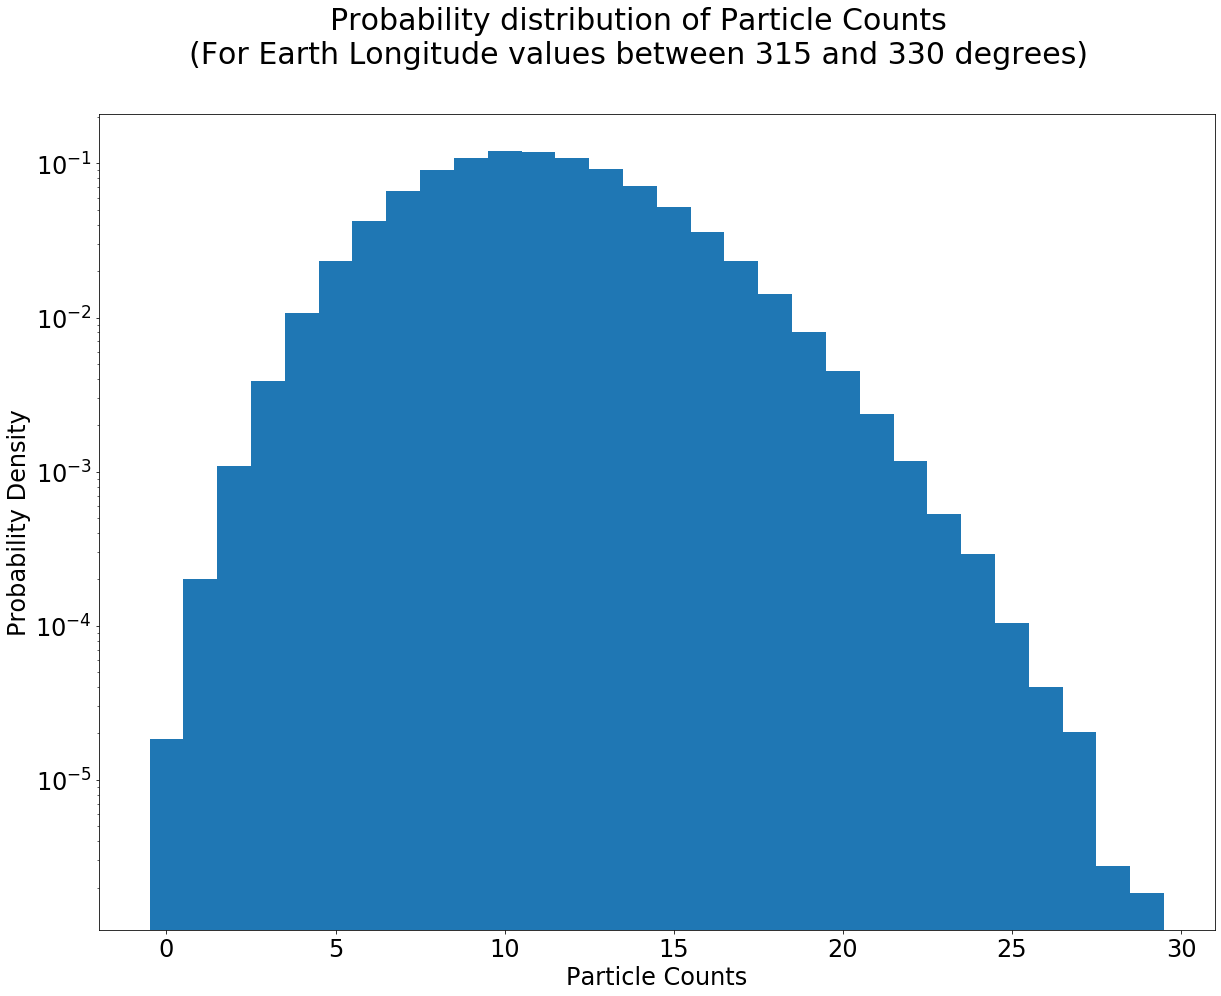

The mean is 10.944813416259441.


In [397]:
plt.suptitle('Probability distribution of Particle Counts\n(For Earth Longitude values between 315 and 330 degrees)', fontsize=30)
plt.xlabel('Particle Counts', fontsize = 24)
plt.ylabel('Probability Density', fontsize = 24)
plt.yscale('log')
plt.tick_params(labelsize = 24)
plt.hist(selected, bins = np.arange(-0.5,30.5), density = True)
plt.show()
print("The mean is " + str(np.mean(selected)) + "." )

We can clearly see that for this range of Earth Longitude, we still have a distribution that looks like Poisson distribution,
<br>but the distribution now has the average 10.94 instead of 6.

Next, we will do the same for some other bins for Earth Longitude.

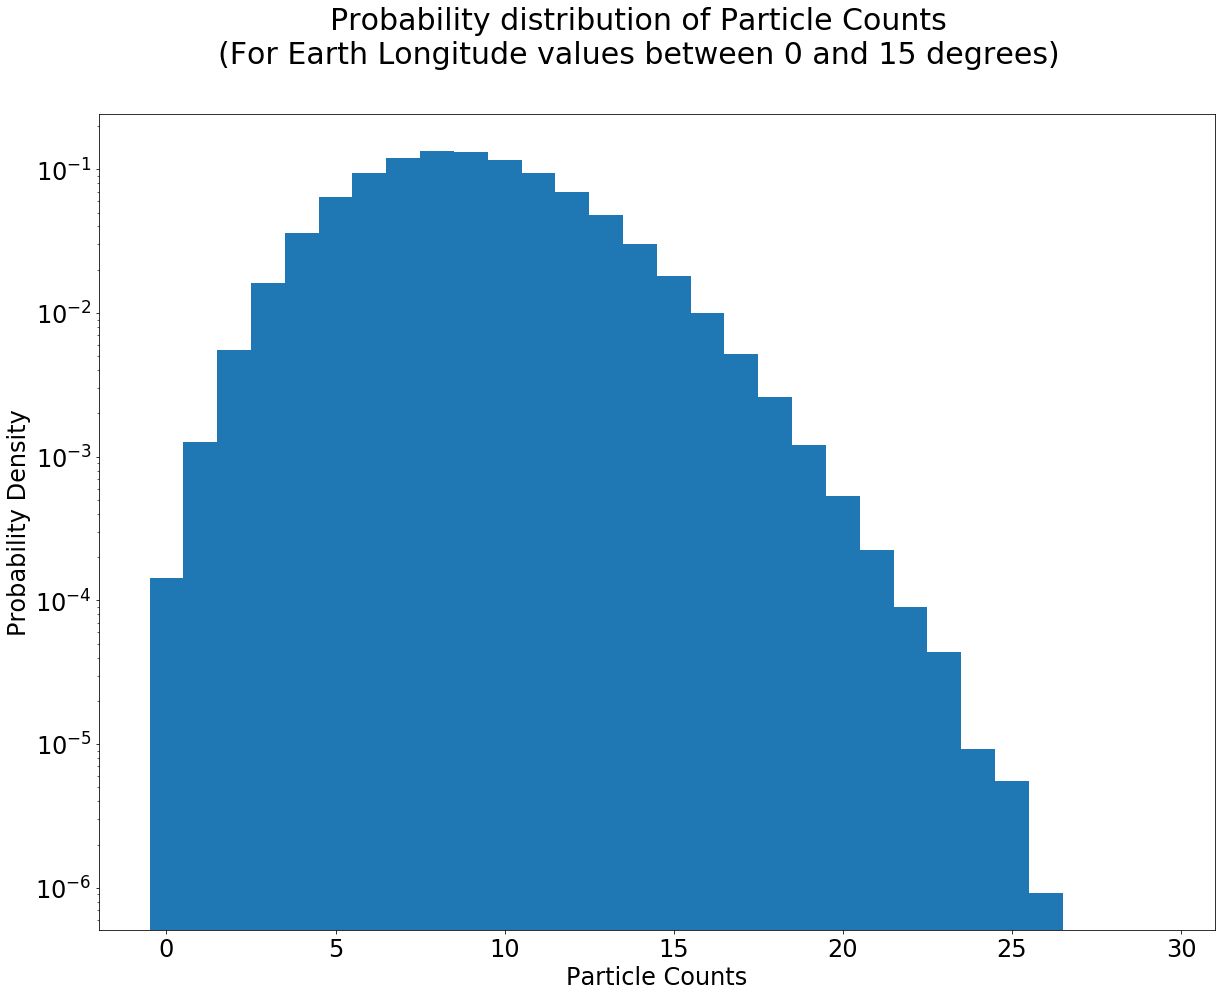

The mean is 8.88371001776988.


In [398]:
indices = np.intersect1d(np.where(0 <= data[2,:]), np.where(15 >= data[2,:]))
selected = data[3,:][indices]
plt.suptitle('Probability distribution of Particle Counts\n(For Earth Longitude values between 0 and 15 degrees)', fontsize=30)
plt.xlabel('Particle Counts', fontsize = 24)
plt.ylabel('Probability Density', fontsize = 24)
plt.yscale('log')
plt.tick_params(labelsize = 24)
plt.hist(selected, bins = np.arange(-0.5,30.5), density = True)
plt.show()
print("The mean is " + str(np.mean(selected)) + "." )

When we increase our Earth Longitude to between 0 and 15 the average drops to 8.88.

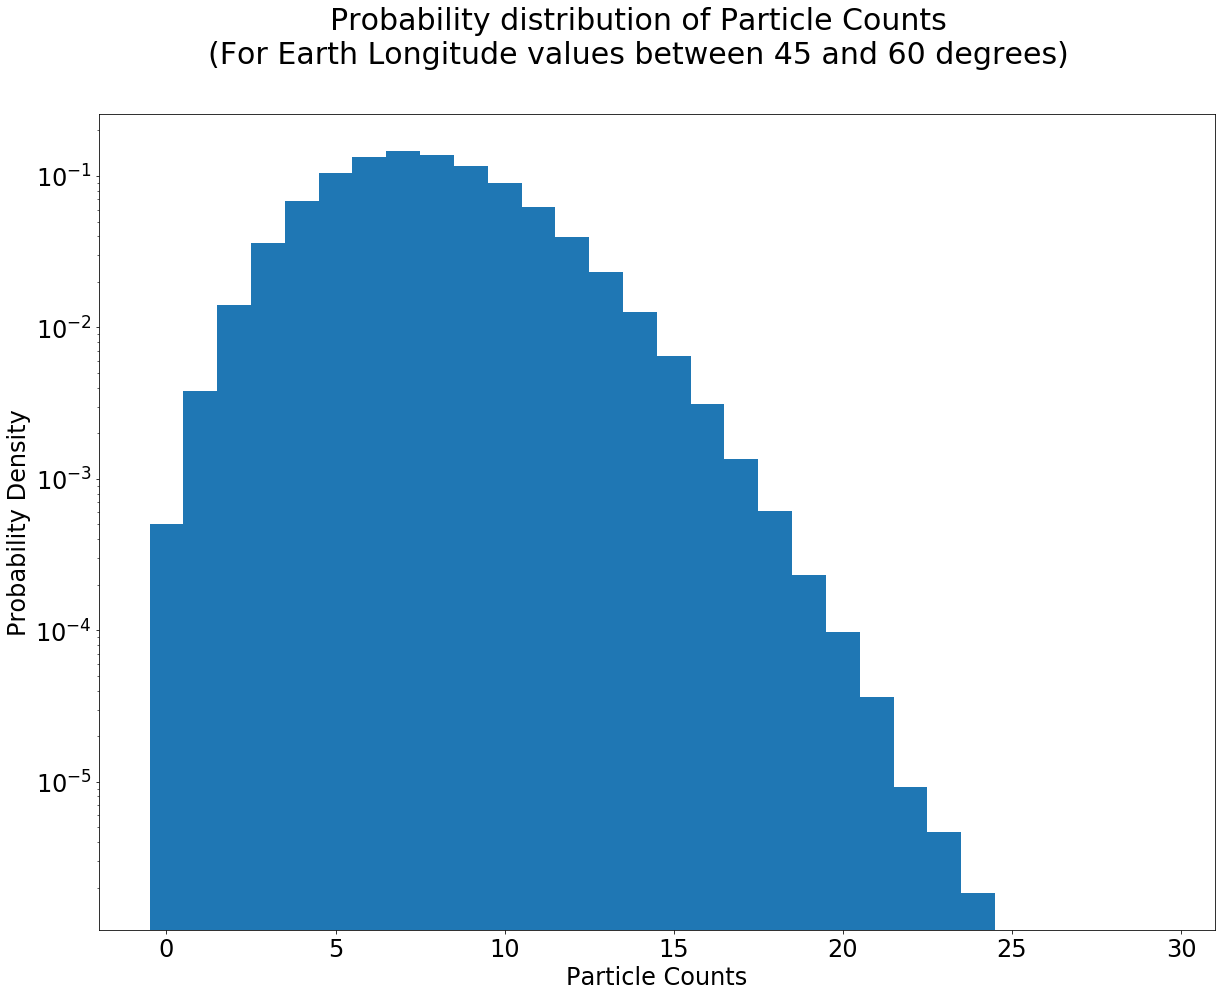

The mean is 7.633267035699841.


In [399]:
indices = np.intersect1d(np.where(15 * 3 <= data[2,:]), np.where(15 * 4 >= data[2,:]))
selected = data[3,:][indices]
plt.suptitle('Probability distribution of Particle Counts\n(For Earth Longitude values between ' + str(15 * 3) + ' and ' + str(15 * 4) + ' degrees)', fontsize=30)
plt.xlabel('Particle Counts', fontsize = 24)
plt.ylabel('Probability Density', fontsize = 24)
plt.yscale('log')
plt.tick_params(labelsize = 24)
plt.hist(selected, bins = np.arange(-0.5,30.5), density = True)
plt.show()
print("The mean is " + str(np.mean(selected)) + "." )

When we increase our Earth Longitude to between 45 and 60, the average drops to 7.63.

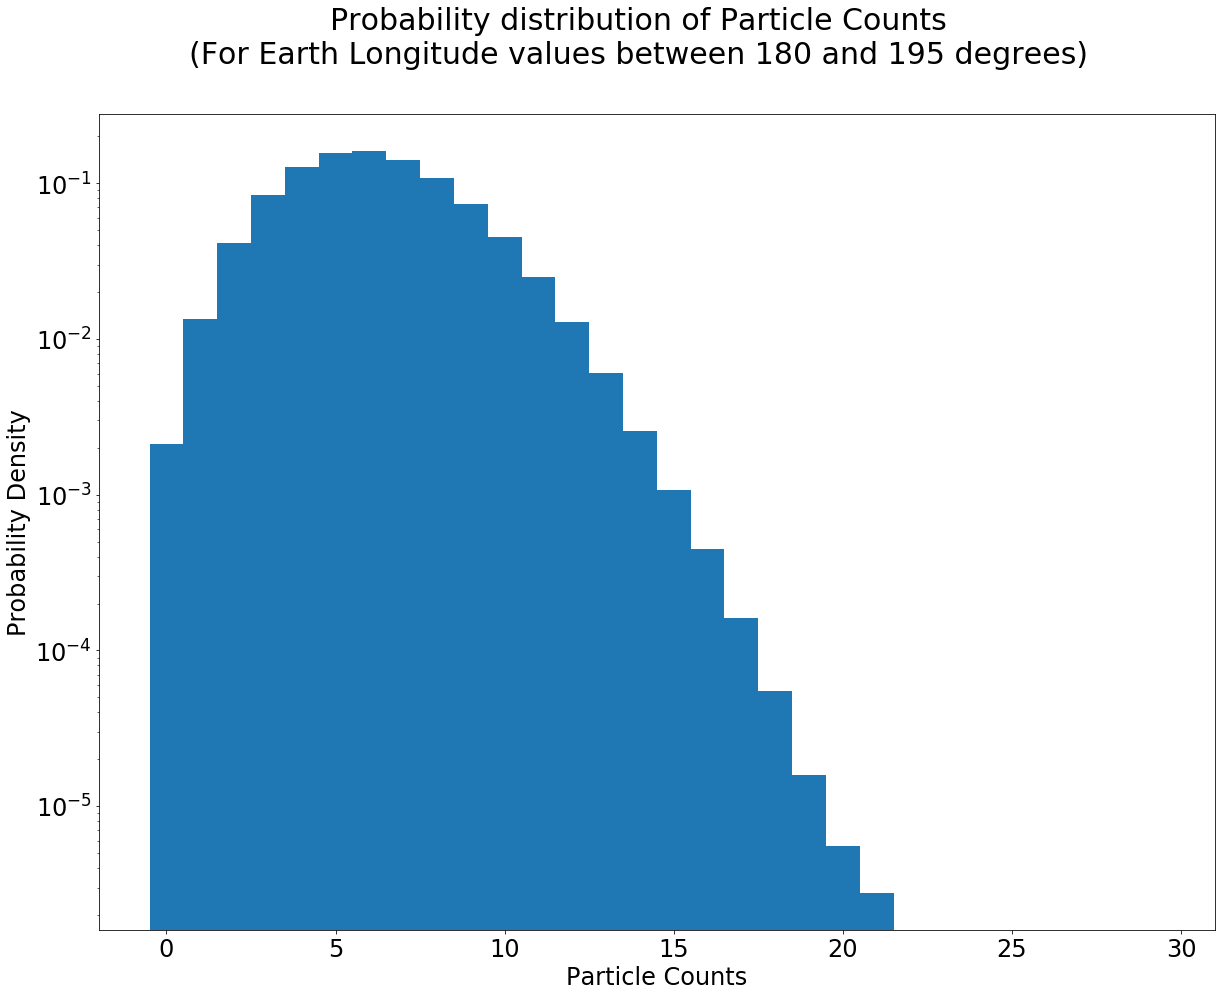

The mean is 6.1290537538871614.


In [400]:
indices = np.intersect1d(np.where(15 * 12 <= data[2,:]), np.where(15 * 13 >= data[2,:]))
selected = data[3,:][indices]
plt.suptitle('Probability distribution of Particle Counts\n(For Earth Longitude values between ' + str(15 * 12) + ' and ' + str(15 * 13) + ' degrees)', fontsize=30)
plt.xlabel('Particle Counts', fontsize = 24)
plt.ylabel('Probability Density', fontsize = 24)
plt.yscale('log')
plt.tick_params(labelsize = 24)
plt.hist(selected, bins = np.arange(-0.5,30.5), density = True)
plt.show()
print("The mean is " + str(np.mean(selected)) + "." )

When we increase our Earth Longitude to between 180 and 195, the average drops to 6.13, which is roughly the same as the mean for the histogram over all data.

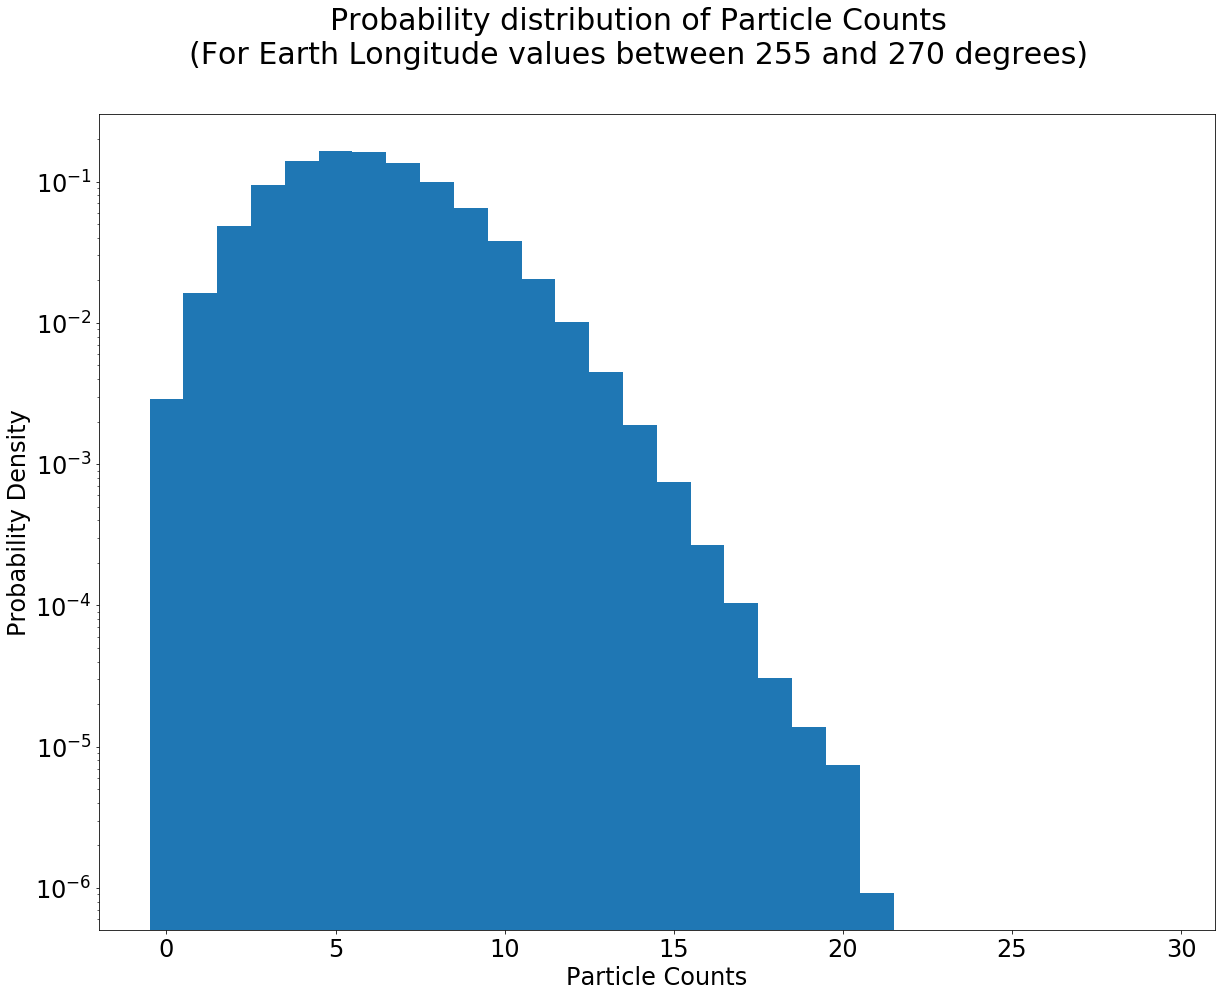

The mean is 5.886400488671701.


In [401]:
indices = np.intersect1d(np.where(15 * 17 <= data[2,:]), np.where(15 * 18 >= data[2,:]))
selected = data[3,:][indices]
plt.suptitle('Probability distribution of Particle Counts\n(For Earth Longitude values between ' + str(15 * 17) + ' and ' + str(15 * 18) + ' degrees)', fontsize=30)
plt.xlabel('Particle Counts', fontsize = 24)
plt.ylabel('Probability Density', fontsize = 24)
plt.yscale('log')
plt.tick_params(labelsize = 24)
plt.hist(selected, bins = np.arange(-0.5,30.5), density = True)
plt.show()
print("The mean is " + str(np.mean(selected)) + "." )

When we increase our Earth Longitude to between 255 and 270. the average drops to 5.82, which is about the same as the overall histogram.
<br>**With Earth Longitude changing, the background maintains a Poisson distribution shape, with its mean changing with different Earth Longitude.**
<br>This makes sense with our overall background being a Poisson distribution, because sums of Poisson distributions (for every range of Earth Longitude) is a Poisson distribution.

The mean of the background changes exactly as we've guessed from the 2D histogram:
<br> It decreases like an exponential from -45 degrees to 315 degrees, decreasing quickly at first but gradually come to a halt.

To get a more overall understanding of the mean of Particle Counts against Earth Longitude, we shall plot the mean for every bin.

In [402]:
binx

array([  0,  15,  30,  45,  60,  75,  90, 105, 120, 135, 150, 165, 180,
       195, 210, 225, 240, 255, 270, 285, 300, 315, 330, 345])

In [403]:
diff = binx[1] - binx[0]
diff

15

In [404]:
means = np.zeros(len(binx))
for i in np.arange(len(binx)):
    indices = np.intersect1d(np.where(diff * i <= data[2,:]), np.where(diff * (i+1) >= data[2,:]))
    selected = data[3,:][indices]
    means[i] =  np.mean(selected)
means

array([ 8.88371002,  8.39808418,  7.9810353 ,  7.63326704,  7.33374796,
        7.07772009,  6.86733489,  6.69168888,  6.53738986,  6.40899878,
        6.30128369,  6.20700059,  6.12905375,  6.05972438,  6.01224456,
        5.95919129,  5.92045017,  5.88640049,  5.86039075,  5.83492707,
        5.81422886, 10.94481342, 10.13517141,  9.45856296])

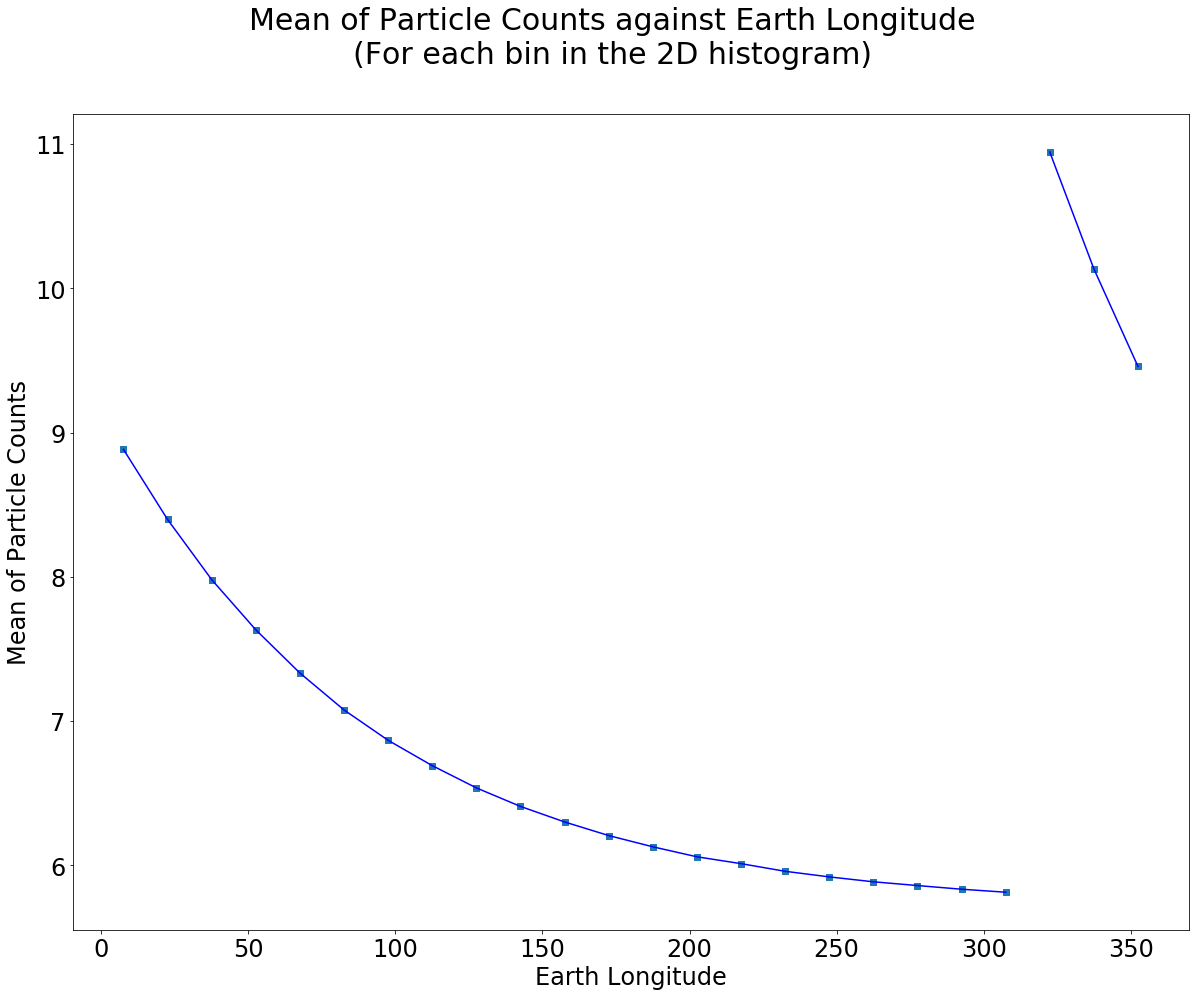

In [407]:
plt.suptitle('Mean of Particle Counts against Earth Longitude\n(For each bin in the 2D histogram)', fontsize=30)
plt.xlabel('Earth Longitude', fontsize = 24)
plt.ylabel('Mean of Particle Counts', fontsize = 24)
plt.tick_params(labelsize = 24)
plt.scatter(binx + diff/2, means, marker = 's')
plt.plot(binx[0:21] + diff/2, means[0:21], 'b')
plt.plot(binx[21:] + diff/2, means[21:], 'b')
plt.show()

### **It appears that the means of Particle Count goes like a *decreasing exponential* with respect to Earth Longitude.<br>At 315 degrees, the mean will suddenly increases to a higher value, where it will decay like the same exponential in the next peroid.**

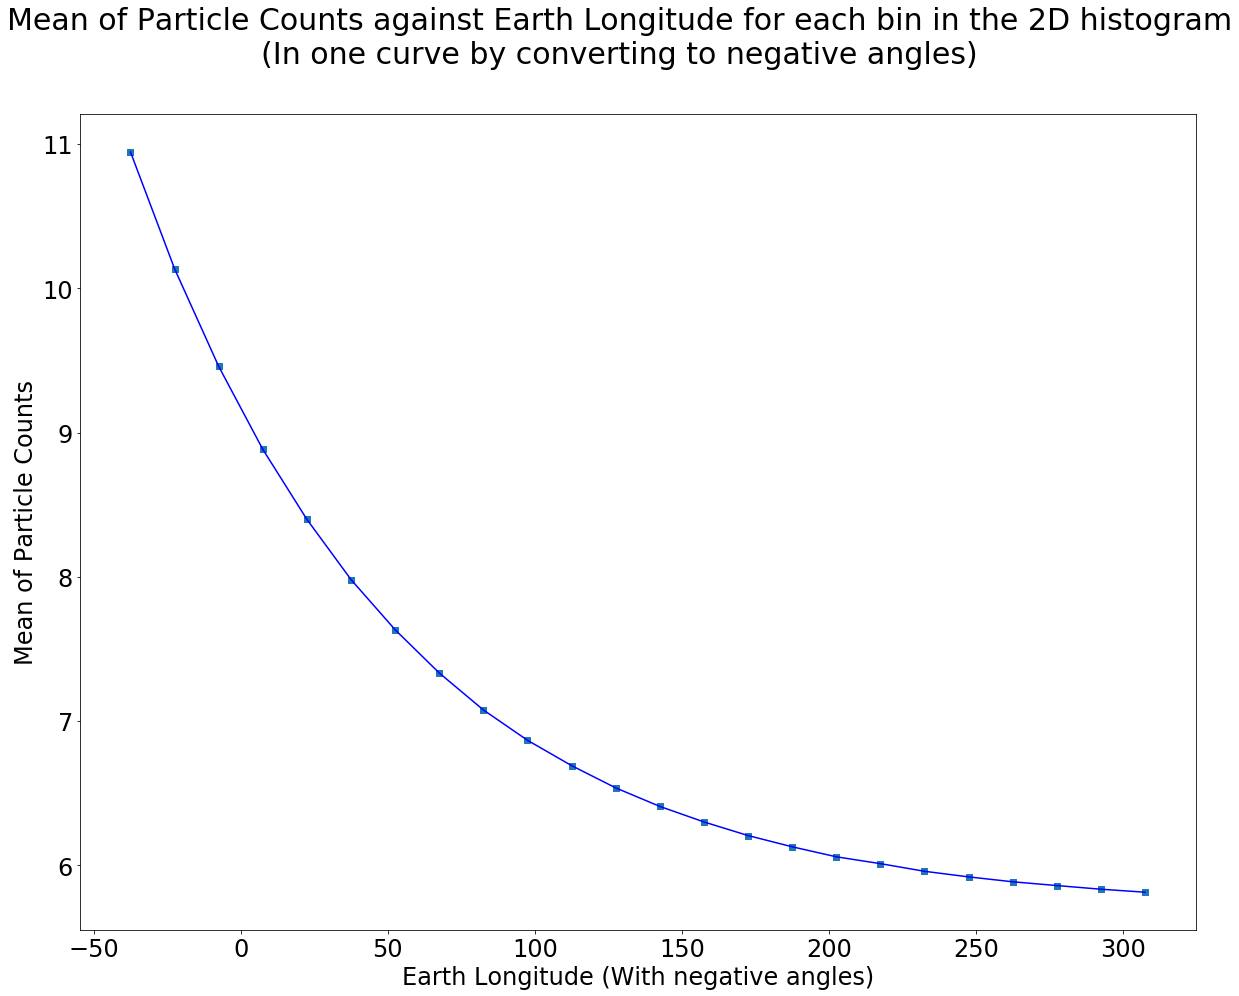

In [409]:
plt.suptitle('Mean of Particle Counts against Earth Longitude for each bin in the 2D histogram\n(In one curve by converting to negative angles)', fontsize=30)
plt.xlabel('Earth Longitude (With negative angles)', fontsize = 24)
plt.ylabel('Mean of Particle Counts', fontsize = 24)
plt.tick_params(labelsize = 24)
meansp = np.append(means, means[0])
bin_neg = np.append(binx + diff/2, binx[0] + diff/2)
for i in np.arange(len(binx)):
    if bin_neg[i] > 320:
        bin_neg[i] -= 360
plt.scatter(bin_neg, meansp, marker = 's')
plt.plot(bin_neg[0:21], meansp[0:21], 'b')
plt.plot(bin_neg[21:], meansp[21:], 'b')
plt.show()

Next, we will plot the means along with the original 2D hist:

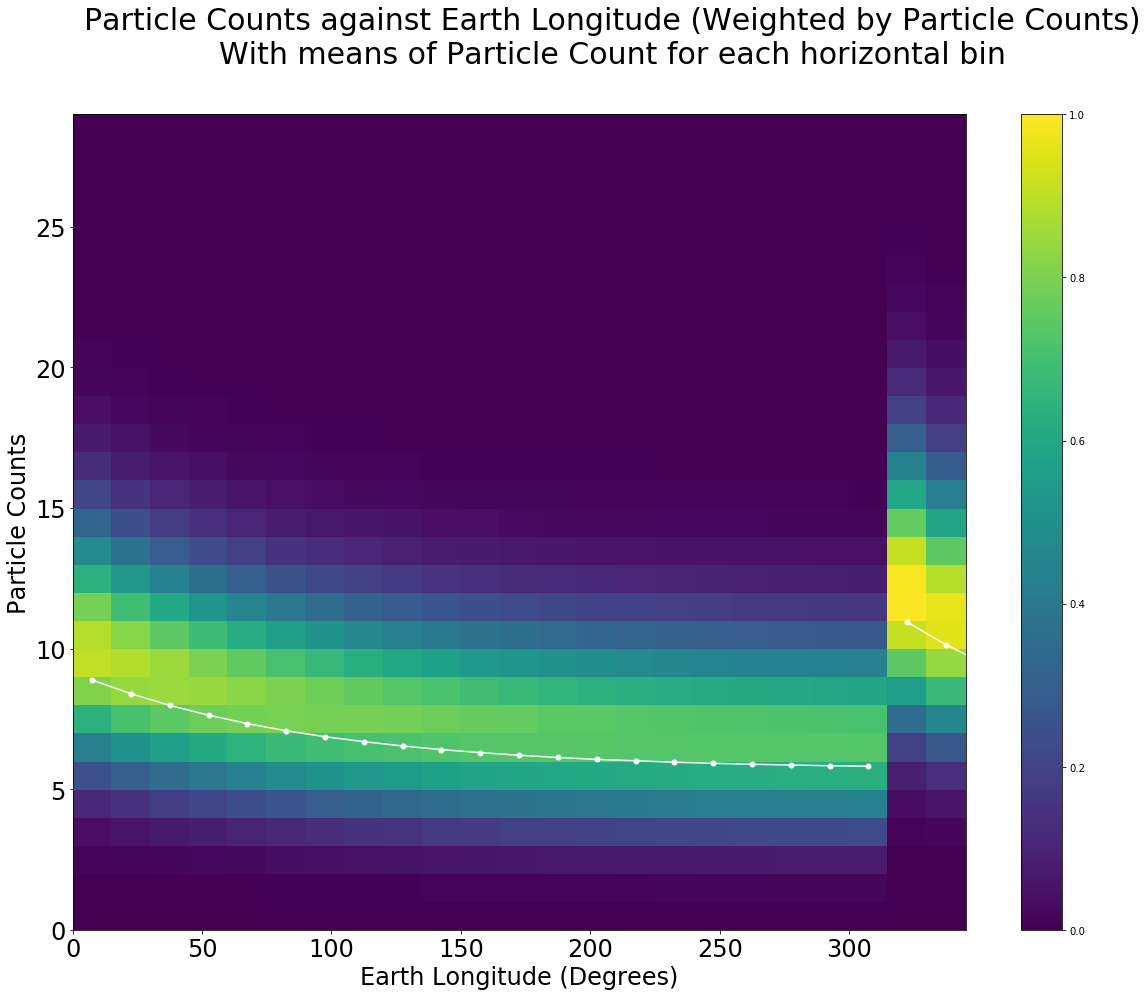

In [410]:
plt.suptitle('Particle Counts against Earth Longitude (Weighted by Particle Counts)\nWith means of Particle Count for each horizontal bin', fontsize=30)
plt.xlabel('Earth Longitude (Degrees)', fontsize = 24)
plt.ylabel('Particle Counts', fontsize = 24)
plt.tick_params(labelsize = 24)
binx = np.arange(0, 360, 15)
biny = np.arange(0,30)
plt.hist2d(data[2,:], data[3,:],  bins = [binx, biny], weights = data[3,:])
plt.scatter(binx + diff/2, means, s = 25, c = 'w', marker = 'o')
plt.plot(binx[0:21] + diff/2, means[0:21], 'w')
plt.plot(binx[21:] + diff/2, means[21:], 'w')
plt.colorbar()

It appears that our means for Particle Counts match rather well with the 2D histogram's most populated bins.

## In conclusion:
### By seeing angles greater than around 315 degrees as negative angles [$\theta -> (\theta - 360^{\circ})$], the background changes by the mean of the distribution (Poisson) decreases exponentially with increasing Earth longitude.


## 3)


While Particle Counts appears to be independent of time over the entire 2D histogram,
<br>Earth Longitude, which Particle Counts is dependent on, is actually peroidically dependent on time.
<br>This is because the data is collected from a Satellite orbiting the Earth, explaning the peroidical change with Longitude.

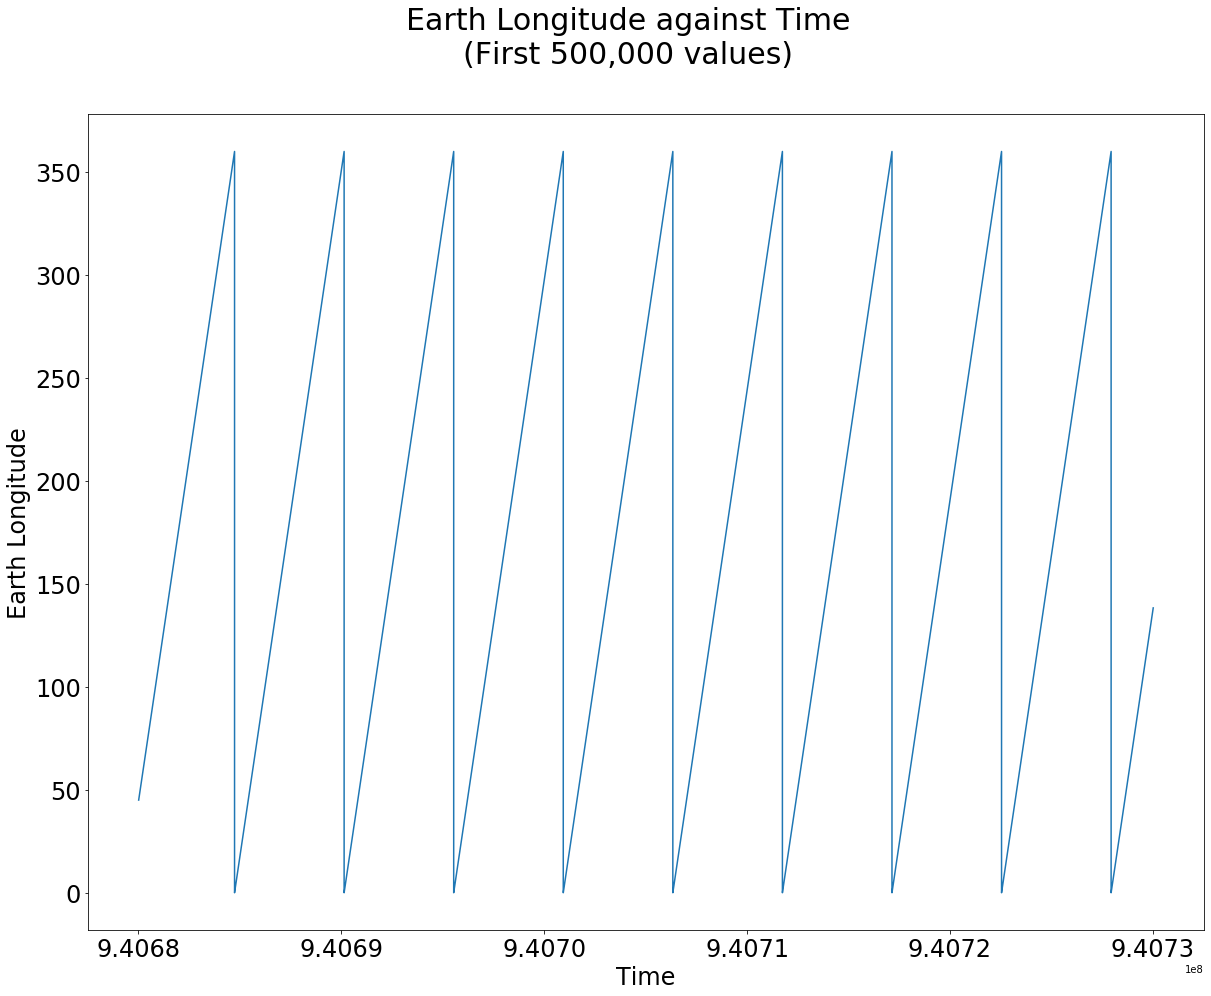

In [411]:
plt.suptitle('Earth Longitude against Time\n(First 500,000 values)', fontsize=30)
plt.xlabel('Time', fontsize = 24)
plt.ylabel('Earth Longitude', fontsize = 24)
plt.tick_params(labelsize = 24)
plt.plot(data[0,0:500000], data[2,0:500000])
plt.show()

In [412]:
data[2,0]

45.0

The Satellite's first data is collected at 45 degrees. After going through an entire cycle around the globe, Earth Longitude gets back to 45.
<br>We should be able to know the peroid by finding the indicies where Earth Longitude is 45 degrees, then finding difference in time.

In [413]:
long = data[2,:]
indices = np.where(long == 45)
time_reset = data[0, :][indices]
time_reset
peroid = np.zeros(len(time_reset) - 1)
for i in np.arange(len(time_reset) - 1):
    peroid[i] = time_reset[i + 1] - time_reset[i]
peroid

array([5400., 5400., 5400., 5400., 5400., 5400., 5400., 5400., 5400.,
       5400., 5400., 5400., 5400., 5400., 5400., 5400., 5400., 5400.,
       5400., 5400., 5400., 5400., 5400., 5400., 5400., 5400., 5400.,
       5400., 5400., 5400., 5400., 5400., 5400., 5400., 5400., 5400.,
       5400., 5400., 5400., 5400., 5400., 5400., 5400., 5400., 5400.,
       5400., 5400., 5400., 5400., 5400., 5400., 5400., 5400., 5400.,
       5400., 5400., 5400., 5400., 5400., 5400., 5400., 5400., 5400.,
       5400., 5400., 5400., 5400., 5400., 5400., 5400., 5400., 5400.,
       5400., 5400., 5400., 5400., 5400., 5400., 5400., 5400., 5400.,
       5400., 5400., 5400., 5400., 5400., 5400., 5400., 5400., 5400.,
       5400., 5400., 5400., 5400., 5400., 5400., 5400., 5400., 5400.,
       5400., 5400., 5400., 5400., 5400., 5400., 5400., 5400., 5400.,
       5400., 5400., 5400., 5400., 5400., 5400., 5400., 5400., 5400.,
       5400., 5400., 5400., 5400., 5400., 5400., 5400., 5400., 5400.,
       5400., 5400.,

This matches what we're given from the report.
<br> The Satellite orbits the earth in 90 minutes (5400 seconds), which is one peroid for the measurements.

Since we've confirmed the peroid of the data, we can fold time into periods and see what kind of pattern Particle Count has with Folded Time.
<br>Also, since time doesn't start at 0, we will use the relative folded time instead. (The first entry will become 0.0s, so will the 54001st entry.)

In [414]:
time_fold = (data[0,:] - data[0,0]) % 5400

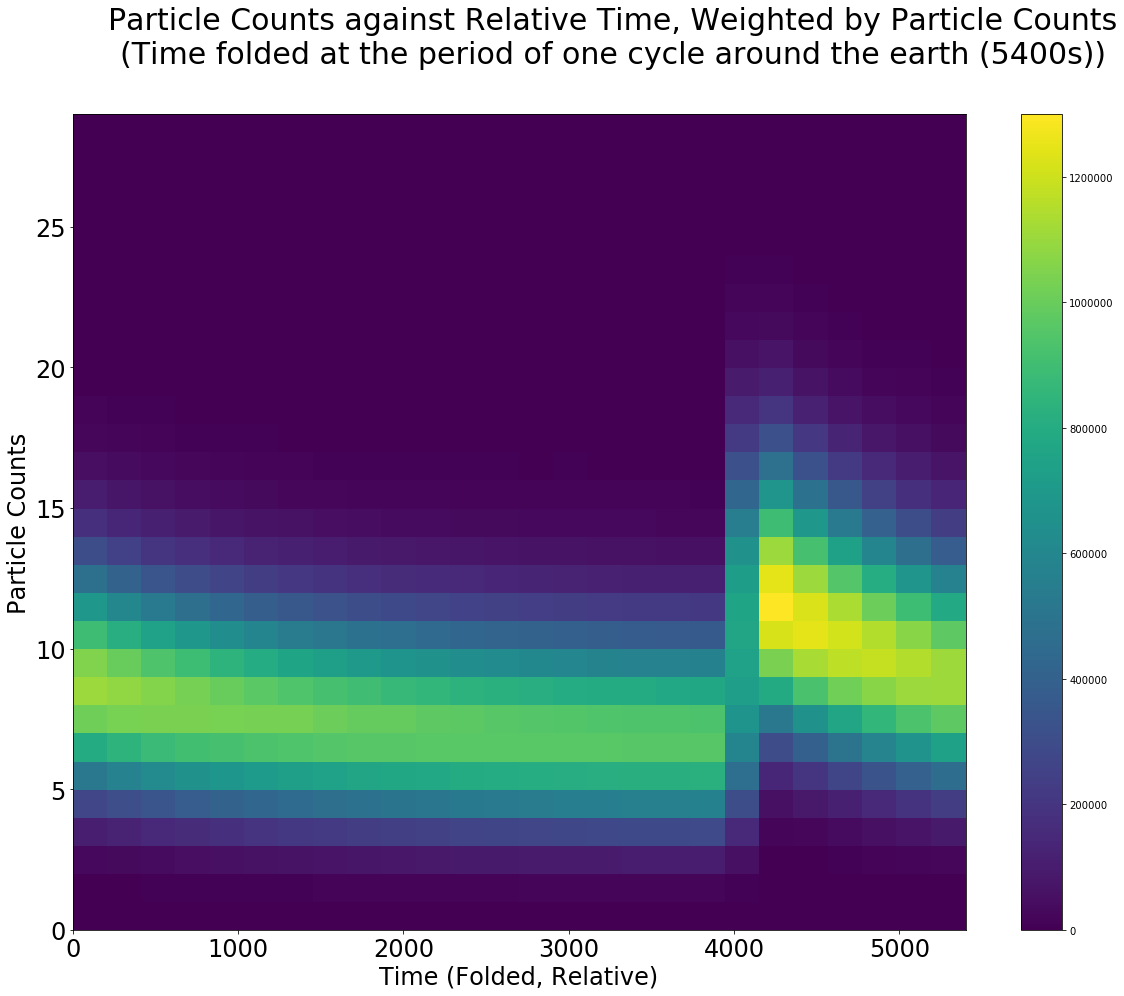

In [496]:
plt.suptitle('Particle Counts against Relative Time, Weighted by Particle Counts\n(Time folded at the period of one cycle around the earth (5400s))', fontsize=30)
plt.xlabel('Time (Folded, Relative)', fontsize = 24)
plt.ylabel('Particle Counts', fontsize = 24)
plt.tick_params(labelsize = 24)
binx = np.linspace(0, 5400, 27)
biny = np.arange(0,30)
pc_1period = plt.hist2d(time_fold, data[3,:],  bins = [binx, biny], weights = data[3,:])
plt.colorbar()
plt.show()

Let's check if our data still look like the Poisson distribution.
<br>We'll check by plotting the histogram of all Particle distribution at the start of the peroid (Folded relative time = 0.0s)

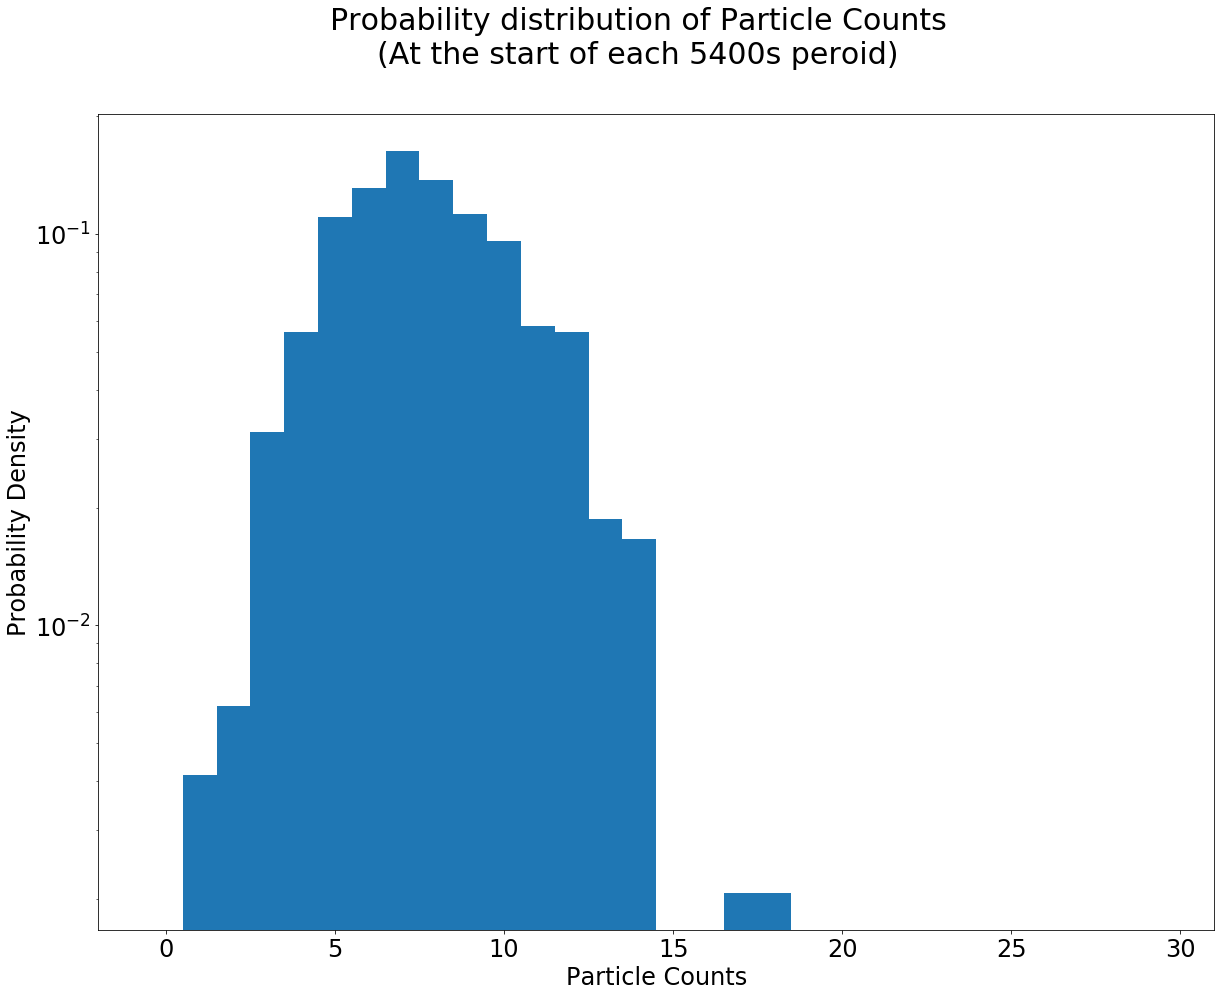

In [416]:
# Since data is peroidical, we know that every 54000th data has folded relative time = 0.0s
indices = np.arange(0,len(time_fold),54000)
selected = data[3,:][indices]
plt.suptitle('Probability distribution of Particle Counts\n(At the start of each 5400s peroid)', fontsize = 30)
plt.xlabel('Particle Counts', fontsize = 24)
plt.ylabel('Probability Density', fontsize = 24)
plt.yscale('log')
plt.tick_params(labelsize = 24)
plt.hist(selected, bins = np.arange(-0.5,30.5), density = True)
plt.show()

We can see that although there are a few outliers, the general shape of the distribution is still close to that of a Poisson.

**Since the mean is the only parameter for the Poisson distribution,<br>and as we worked out previously,the mean is dependent on Longitude.** 

**Thus within a single peroid, mean is dependent on Time.** 

## We shall find the mean to each step in folded time, and that mean will be the mean for our time-dependent Poisson distribution.

In [417]:
means = np.zeros(54000)
for i in np.arange(0,54000):
    indices = np.arange(i,len(time_fold),54000)
    selected = data[3,:][indices]
    means[i] =  np.mean(selected)
means

array([7.73388773, 7.78541667, 7.86875   , ..., 7.57916667, 7.64166667,
       7.88333333])

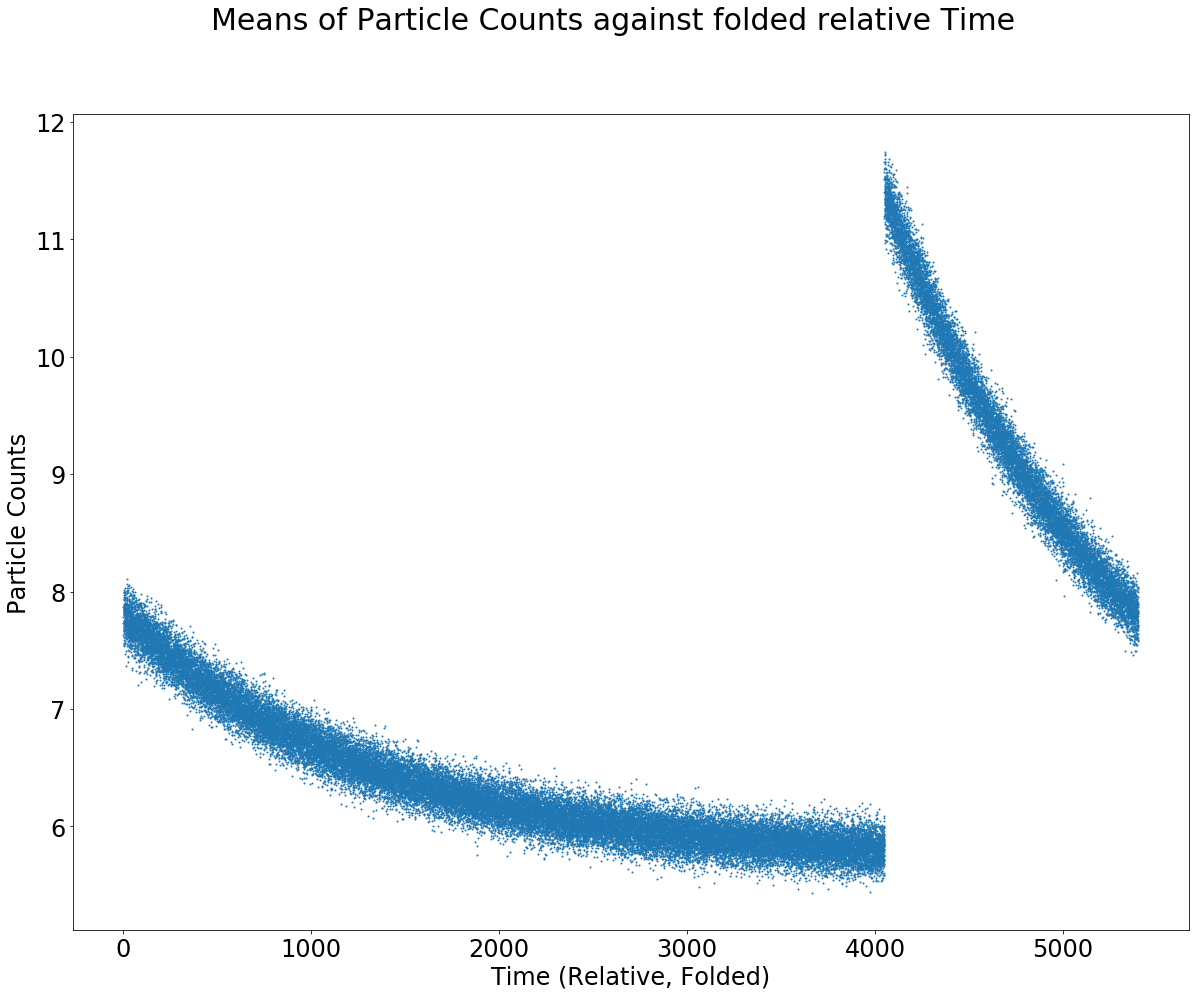

In [418]:
plt.suptitle('Means of Particle Counts against folded relative Time', fontsize = 30)
plt.xlabel('Time (Relative, Folded)', fontsize = 24)
plt.ylabel('Particle Counts', fontsize = 24)
plt.tick_params(labelsize = 24)
plt.scatter(time_fold[0:54000], means, s = 1)
plt.show()

We can see the trend of the data clearly, but we would want to shift the start of the peroid so we could see a uniform decreasing exponential.

In [419]:
for i in np.arange(len(means) - 1):
    # From the graph, it appears that no two adjacent points have a separation greater than two aside from the jump.
    if means[i + 1] - means [i] > 3:
        print(i + 1)
        new_start = i + 1

40500


In [420]:
5400 - 4050

1350

At the 40500th entry (Or time 4050s), the mean jumps from around 6 to around 11.5.
<br>We will replot the above plot after shifting right 1350 seconds.

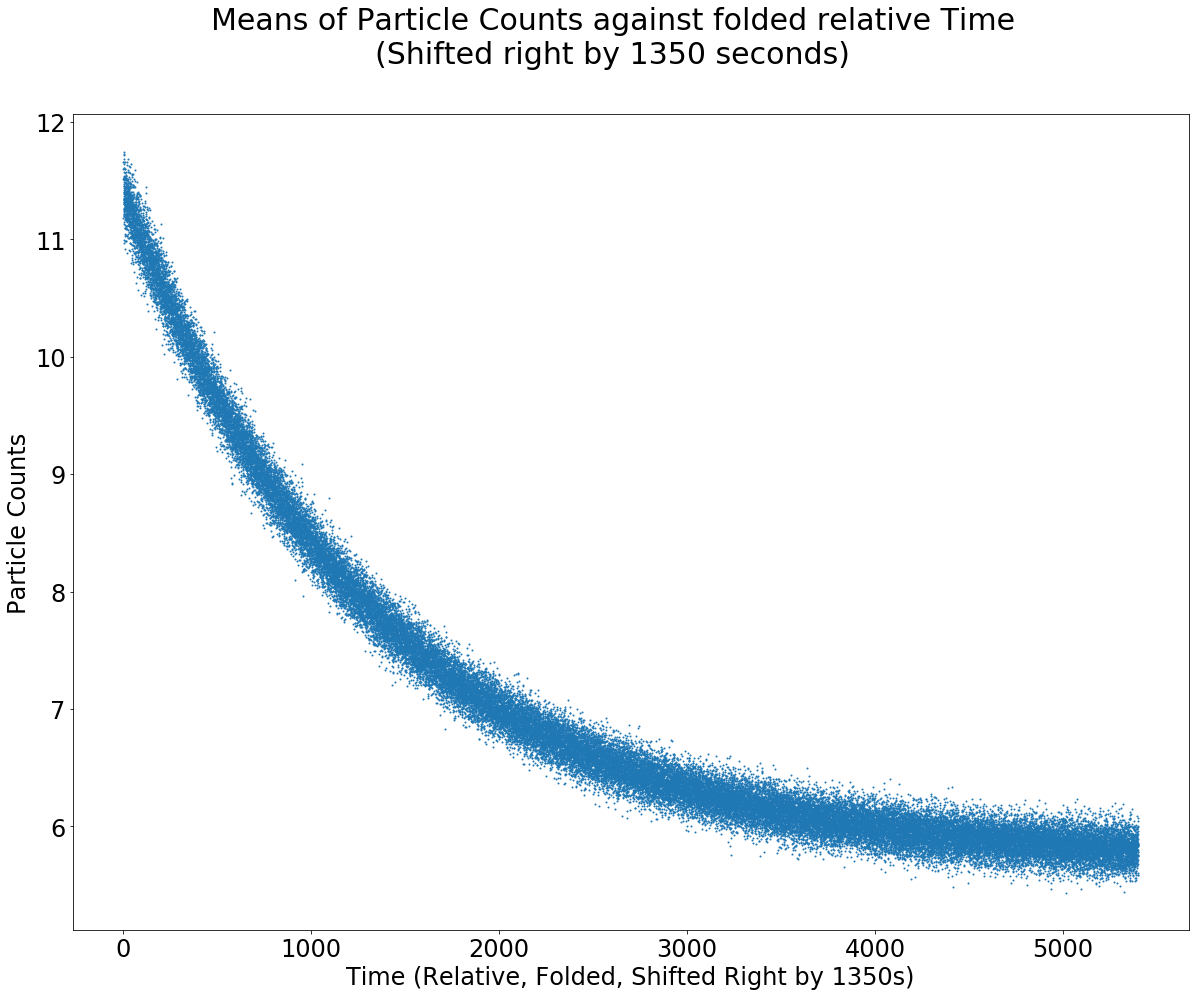

In [101]:
plt.suptitle('Means of Particle Counts against folded relative Time\n(Shifted right by 1350 seconds)', fontsize = 30)
plt.xlabel('Time (Relative, Folded, Shifted Right by 1350s)', fontsize = 24)
plt.ylabel('Particle Counts', fontsize = 24)
plt.tick_params(labelsize = 24)
means_shift = np.append(means[40500:], means[0:40500])
plt.scatter(time_fold[0:54000], means_shift, s = 1)
plt.show()

We should be able to find an exponential fit with the above data.
<br>The shape of the graph suggest it looks like a decaying exponential centered at x=5400.
<br>$y=ae^{b(t-5400)} + c$

By experimenting, we made the initial guess of a = 0.01, b = -0.001, c = 5.5.

In [421]:
fit = scipy.optimize.curve_fit(lambda t,a,b,c: a*np.exp(b*(t-5400)) + c, time_fold[0:54000], means_shift, p0 =(0.01, -0.001, 5.5))
fit

(array([ 1.04763330e-01, -7.39907316e-04,  5.69832044e+00]),
 array([[ 1.51079991e-07,  2.71390164e-10, -4.41951069e-07],
        [ 2.71390164e-10,  4.92167883e-13, -7.66836057e-10],
        [-4.41951069e-07, -7.66836057e-10,  1.72354087e-06]]))

This gives us the fit $y=0.105 * e^{-0.00740(t-5400)} + 5.70$

Let's see how it looks like with our mean scatterplot:

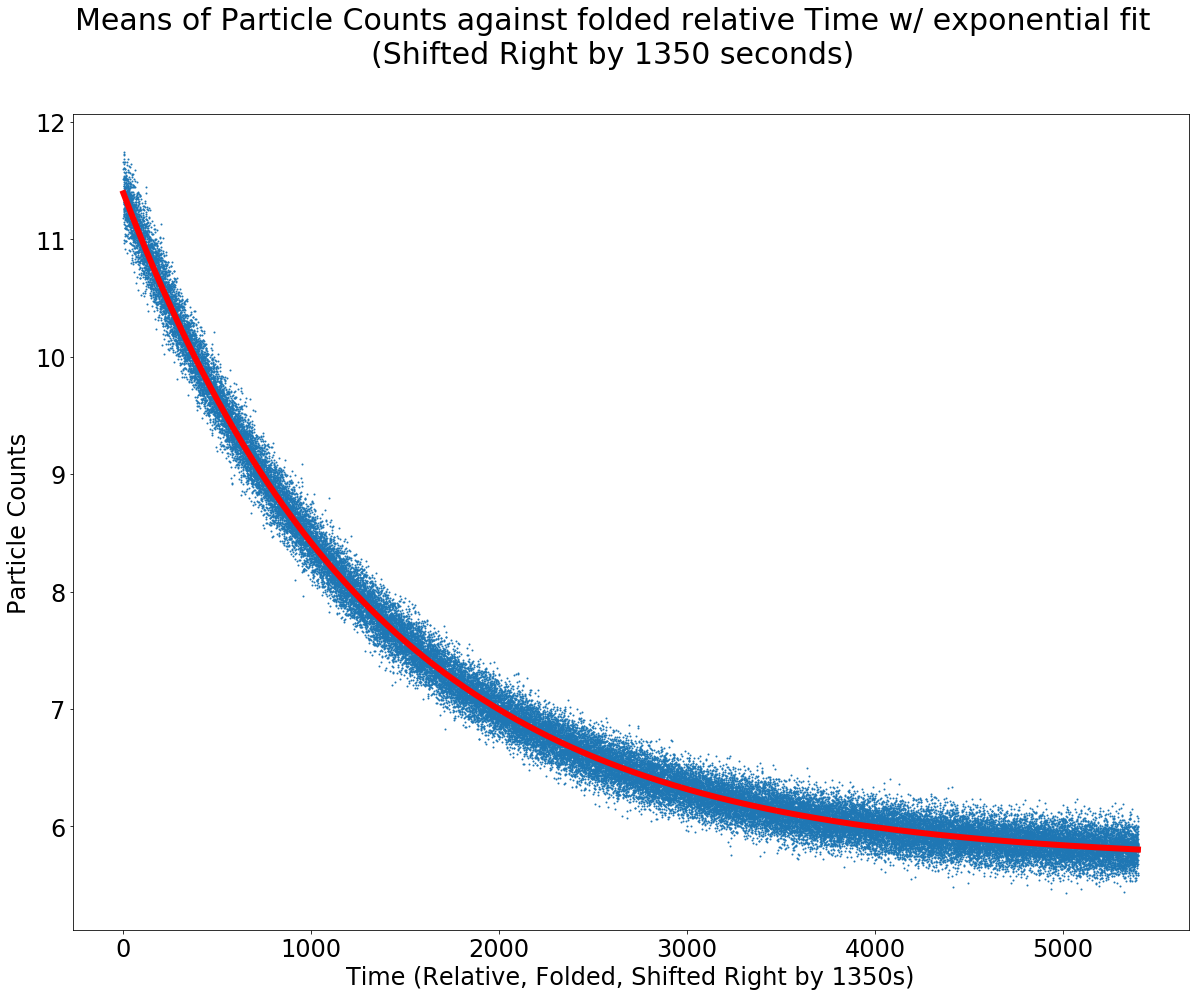

In [422]:
plt.suptitle('Means of Particle Counts against folded relative Time w/ exponential fit\n(Shifted Right by 1350 seconds)', fontsize = 30)
plt.xlabel('Time (Relative, Folded, Shifted Right by 1350s)', fontsize = 24)
plt.ylabel('Particle Counts', fontsize = 24)
plt.tick_params(labelsize = 24)
means_shift = np.append(means[40500:], means[0:40500])
plt.scatter(time_fold[0:54000], means_shift, s = 1)
x = np.linspace(0,5400,10000)
plt.plot(x, fit[0][0] * np.exp(fit[0][1]*(x-5400)) + fit[0][2], color = 'red', linewidth = 6)
plt.show()

Looks like it lies well in the middle of our scatterplot.

## Thus, I shall create the model for this dataset.
## The Probability Mass Function of the Particle Count $P(k,t)$ is a time dependent Poisson distribution
## such that $P(k, t) = e^{-\lambda}\frac{\lambda^k}{k!}$, where the mean $\lambda = 0.105 * e^{-0.00740(t - 5400 - 4050 + 5400n)} + 5.70$,
## or $\lambda = 0.105 * e^{-0.00740(t + 1350 + 5400n)} + 5.70$, where n is a interger.

The exponential curve for the mean fitted quite well with our scatterplot. We'll see how well it fits with our entire data.

In [423]:
#To make things easier, we first write the equation for the mean into a function:
def mean_fit(time):
    return fit[0][0] * np.exp(fit[0][1]*((time + 1350) % (-5400))) + fit[0][2]
        #Our function runs from exp(-5400) to exp(0), so we must mod with -5400!

Since the Probability Mass Function is periodic, we will generate one round of data(54000 entries per round) and see how it compares with the original.

In [424]:
len(data[3,:]) / 54000

480.0000185185185

In [425]:
len(data[3,:]) - 54000 * 480

1

Since we have 480 cycles and 1 entry, generating 480 values per Poisson distribution should give us roughly the same size.
<BR>As for the last extra one, we will just generate 481 values on our initial run (Since they are in phase) to account for that.

In [426]:
total_nums = len(data[3,:])
counts_model = np.zeros(total_nums)
time = time_fold[0:54000]
mean = mean_fit(time_fold[0])
# Inject into every 54000th entry to account for periodical property
counts_model[0::54000] = scipy.stats.poisson.rvs(mean,loc=0,size=481)
for i in np.arange(1,len(time)):
    mean = mean_fit(time_fold[i])
    counts_model[i::54000] = scipy.stats.poisson.rvs(mean,loc=0,size=480)
counts_model

array([ 6.,  6., 10., ...,  3.,  6.,  6.])

We will plot the data above on a 2D histogram against time, as we did with the original data.

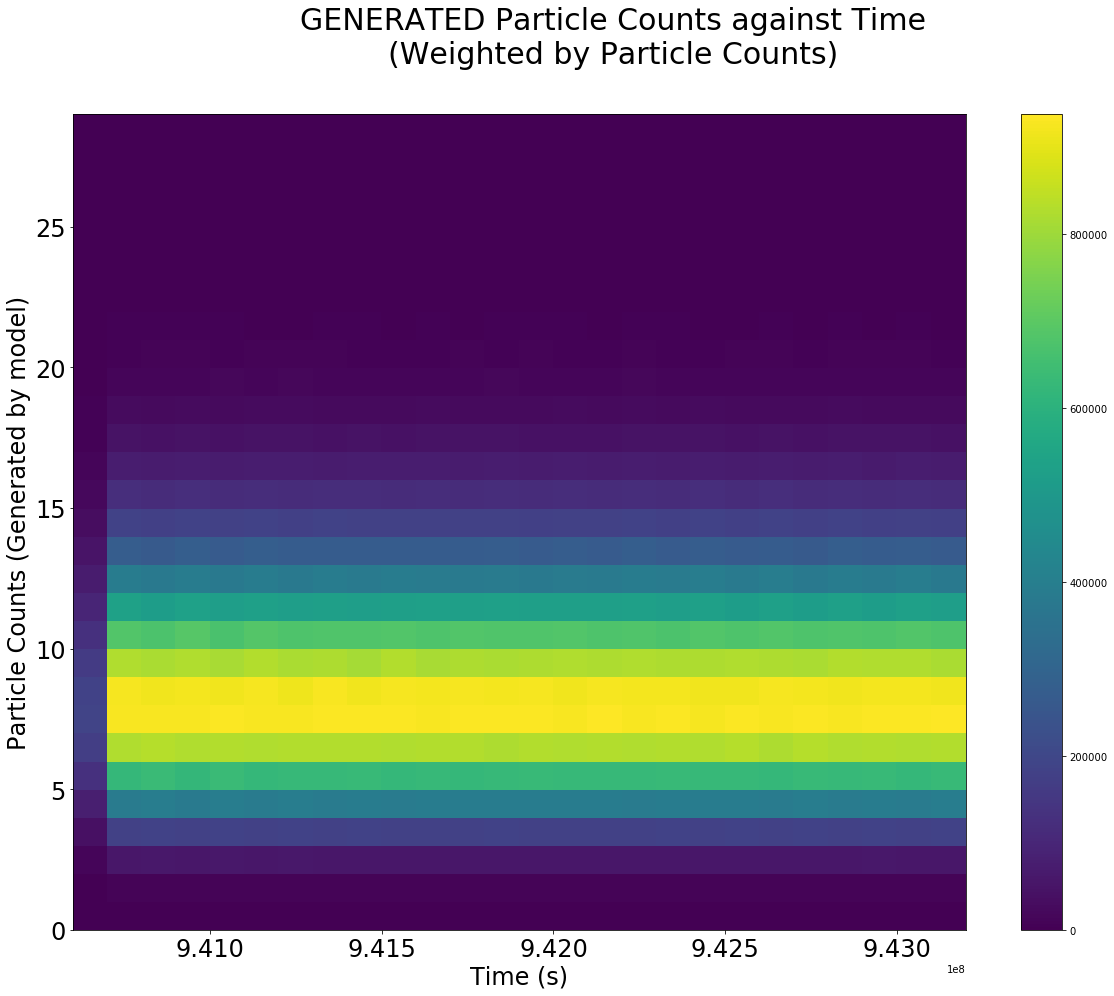

In [431]:
plt.suptitle('GENERATED Particle Counts against Time\n(Weighted by Particle Counts)', fontsize=30)
plt.xlabel('Time (s)', fontsize = 24)
plt.ylabel('Particle Counts (Generated by model)', fontsize = 24)
plt.tick_params(labelsize = 24)
binx = np.arange(9.406e+8,9.433e+8, 0.001e+8)
biny = np.arange(0,30)
model_pc_vs_time = plt.hist2d(data[0,:], counts_model,  bins = [binx, biny], weights = counts_model)
plt.colorbar()

This looks just like the original, but we would like a more precise look at how different our model is from the original.
<br>To do that, we'll plot the difference between the two 2D histograms.

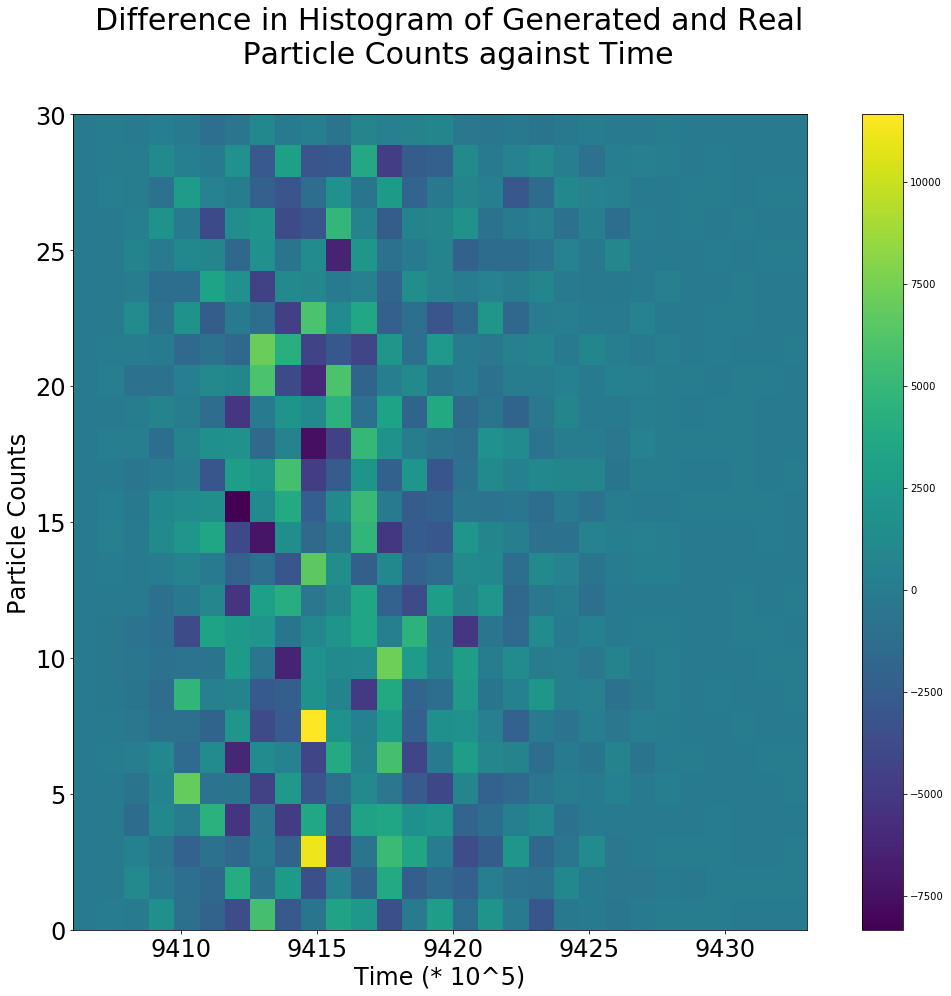

In [492]:
difference = model_pc_vs_time[0] - pc_vs_time[0]
plt.suptitle('Difference in Histogram of Generated and Real \n Particle Counts against Time', fontsize=30)
plt.xlabel('Time (* 10^5)', fontsize = 24)
plt.ylabel('Particle Counts', fontsize = 24)
plt.tick_params(labelsize = 24)
plt.imshow(difference, extent = [9406, 9433, 0,30])
plt.colorbar()

In [493]:
max_error = (max(np.abs(difference.flatten())))
print(max_error)
print(max_error / len(data[3,:]))

11646.0
0.00044930553822123694


It appears our greatest difference in any of the bins in our 2D histogram from our model against the original is above 10,000.
<br>However, since we're dealing with a datasize of 25 million, that's only a **4.49e-4** relative difference which is very small.
<br>I am confident that my model is doing very good with Particle Counts VS Time.

Still, Time it's not very interesting since Particle Count is a constant over Time.
Let's try with Particle Count VS Earth longitude.

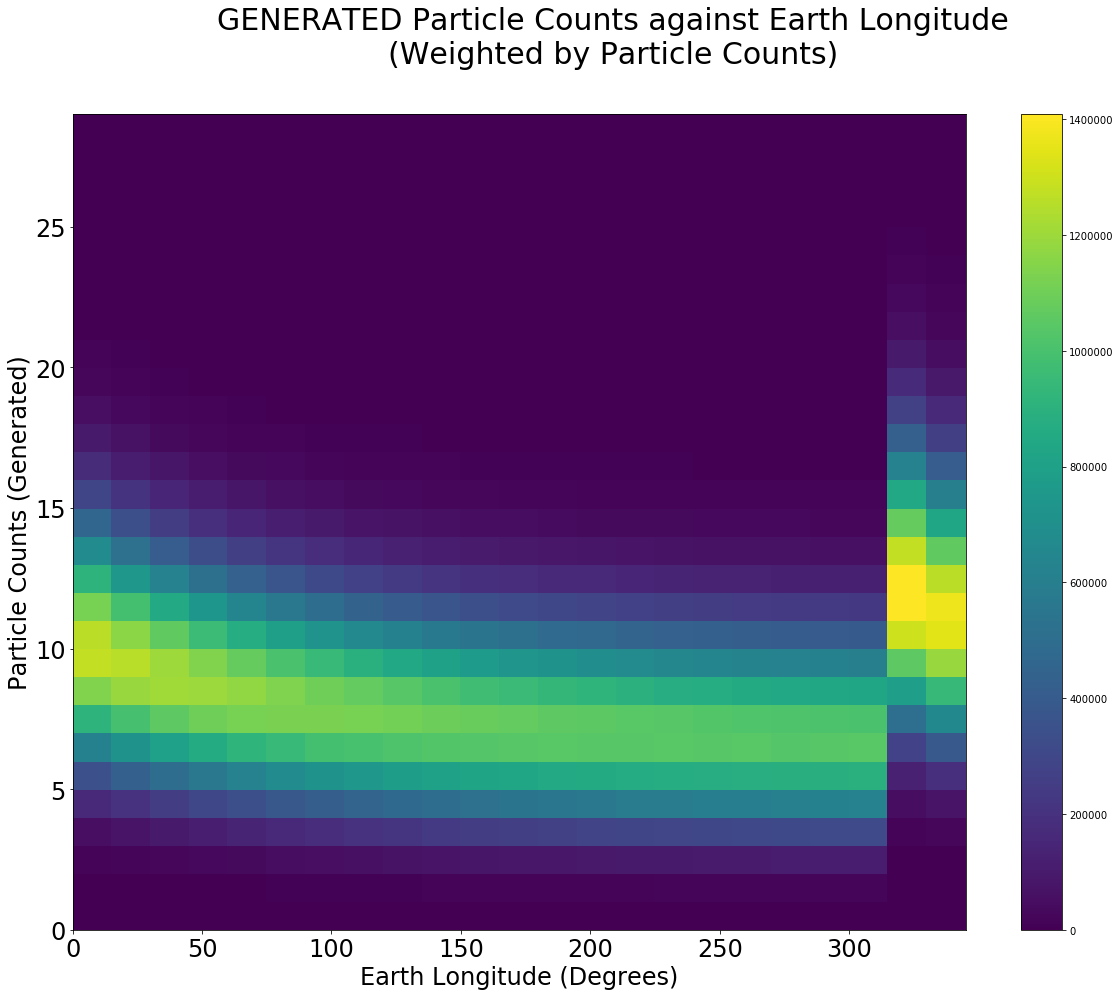

In [481]:
plt.suptitle('GENERATED Particle Counts against Earth Longitude\n(Weighted by Particle Counts)', fontsize=30)
plt.xlabel('Earth Longitude (Degrees)', fontsize = 24)
plt.ylabel('Particle Counts (Generated)', fontsize = 24)
plt.tick_params(labelsize = 24)
binx = np.arange(0, 360, 15)
biny = np.arange(0,30)
model_pc_vs_el = plt.hist2d(data[2,:], counts_model,  bins = [binx, biny], weights = counts_model)
plt.colorbar()

Looks good, we regained the decreasing exponential curve, and the curve of the mean starts and ends in the right bins.

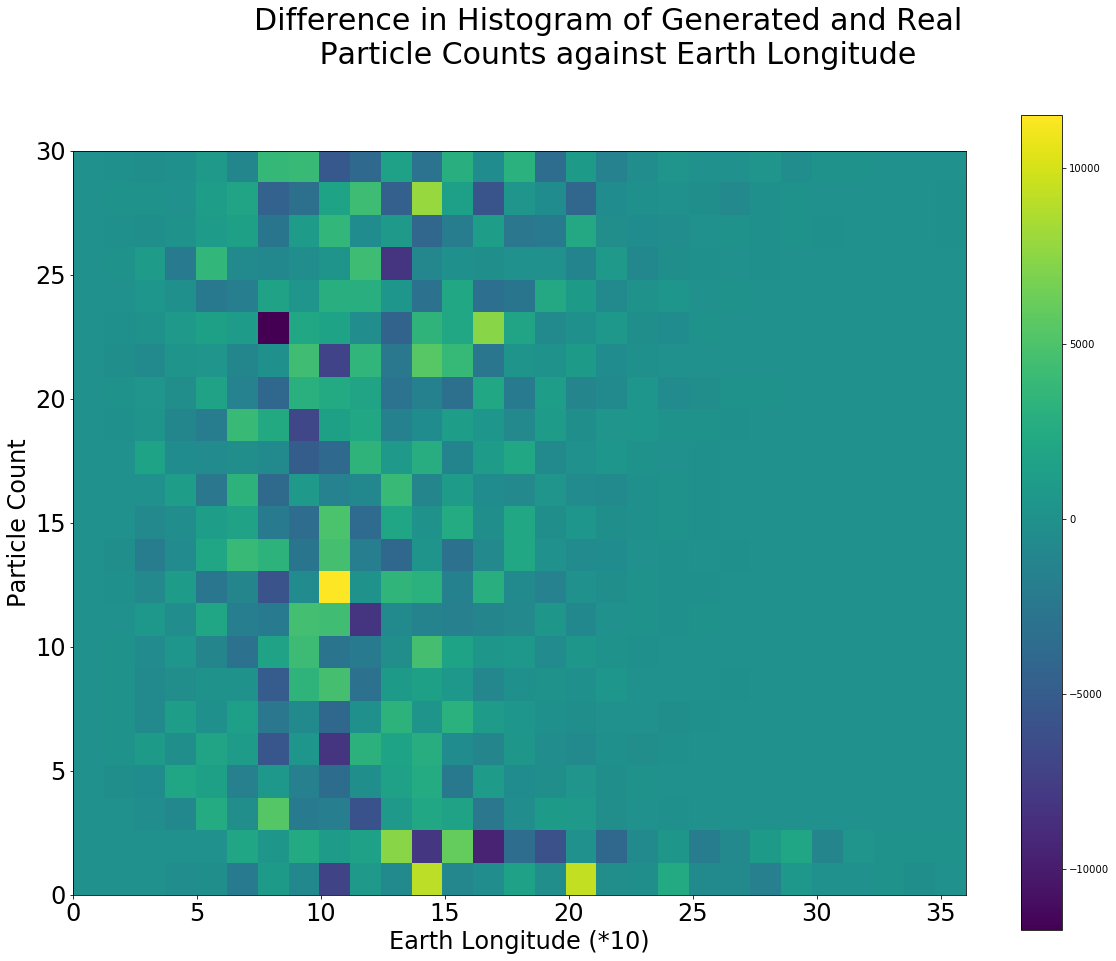

In [487]:
difference = model_pc_vs_el[0] - pc_vs_el[0]
plt.suptitle('Difference in Histogram of Generated and Real \n Particle Counts against Earth Longitude', fontsize=30)
plt.xlabel('Earth Longitude (*10)', fontsize = 24)
plt.ylabel('Particle Count', fontsize = 24)
plt.tick_params(labelsize = 24)
plt.imshow(difference, extent = [0, 36, 0,30])
plt.colorbar()

In [494]:
max_error = (max(np.abs(difference.flatten())))
print(max_error)
print(max_error / len(data[3,:]))

11646.0
0.00044930553822123694


Like Particle Count VS Time, our maximum difference in all histogram bins is about 0.045%.
<br>The model generates a distribution very similar to the actual data.

In [ ]:
Next, we want to see the histogram in one peroid.

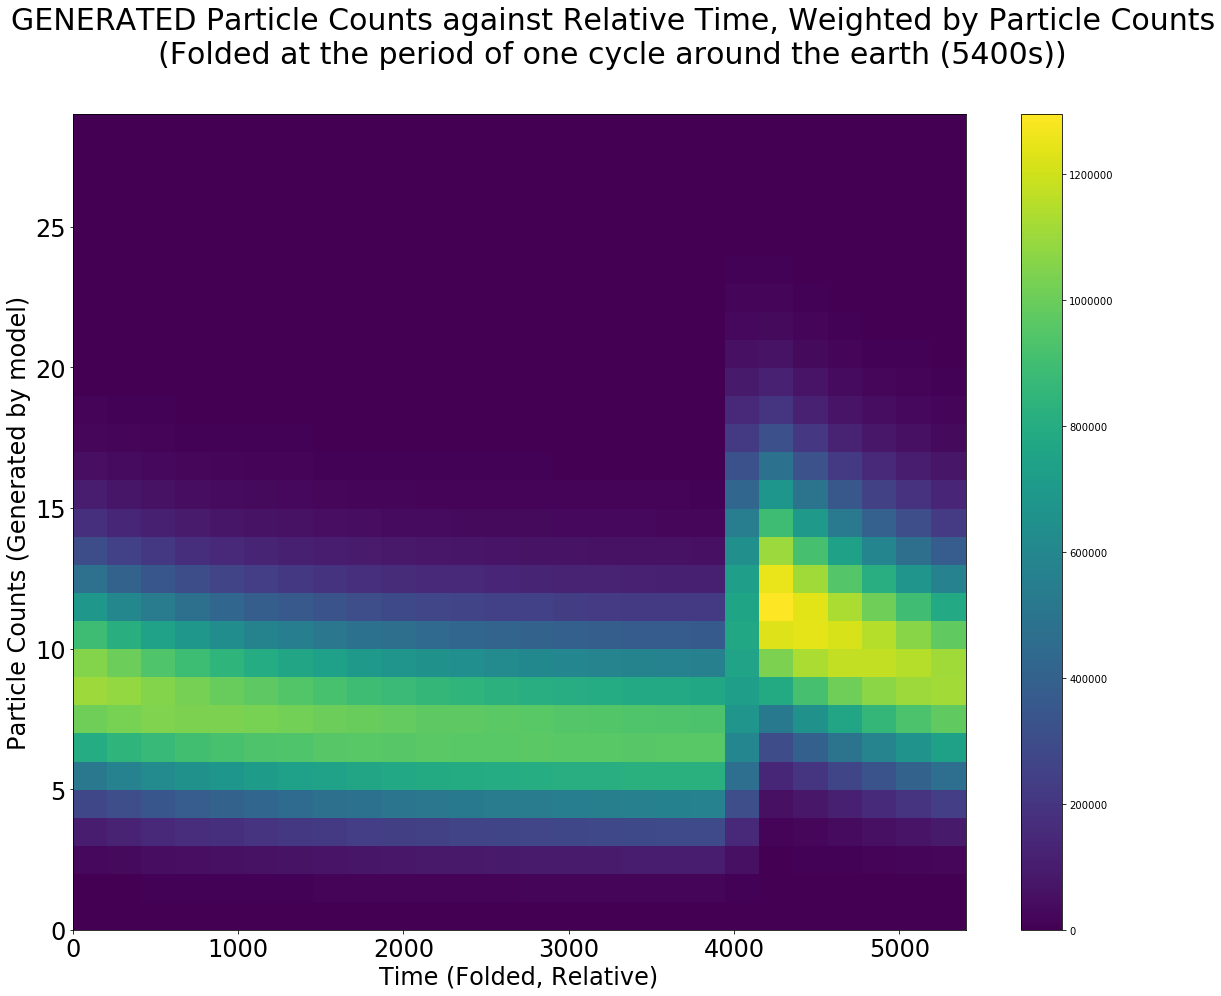

In [495]:
plt.suptitle('GENERATED Particle Counts against Relative Time, Weighted by Particle Counts\n(Folded at the period of one cycle around the earth (5400s))', fontsize=30)
plt.xlabel('Time (Folded, Relative)', fontsize = 24)
plt.ylabel('Particle Counts (Generated by model)', fontsize = 24)
plt.tick_params(labelsize = 24)
binx = np.linspace(0, 5400, 27)
biny = np.arange(0,30)
model_pc_1period = plt.hist2d(time_fold, counts_model,  bins = [binx, biny], weights = counts_model)
plt.colorbar()
plt.show()

Great, looks just like the original!
<br>Again, we check quantitatively the differences:

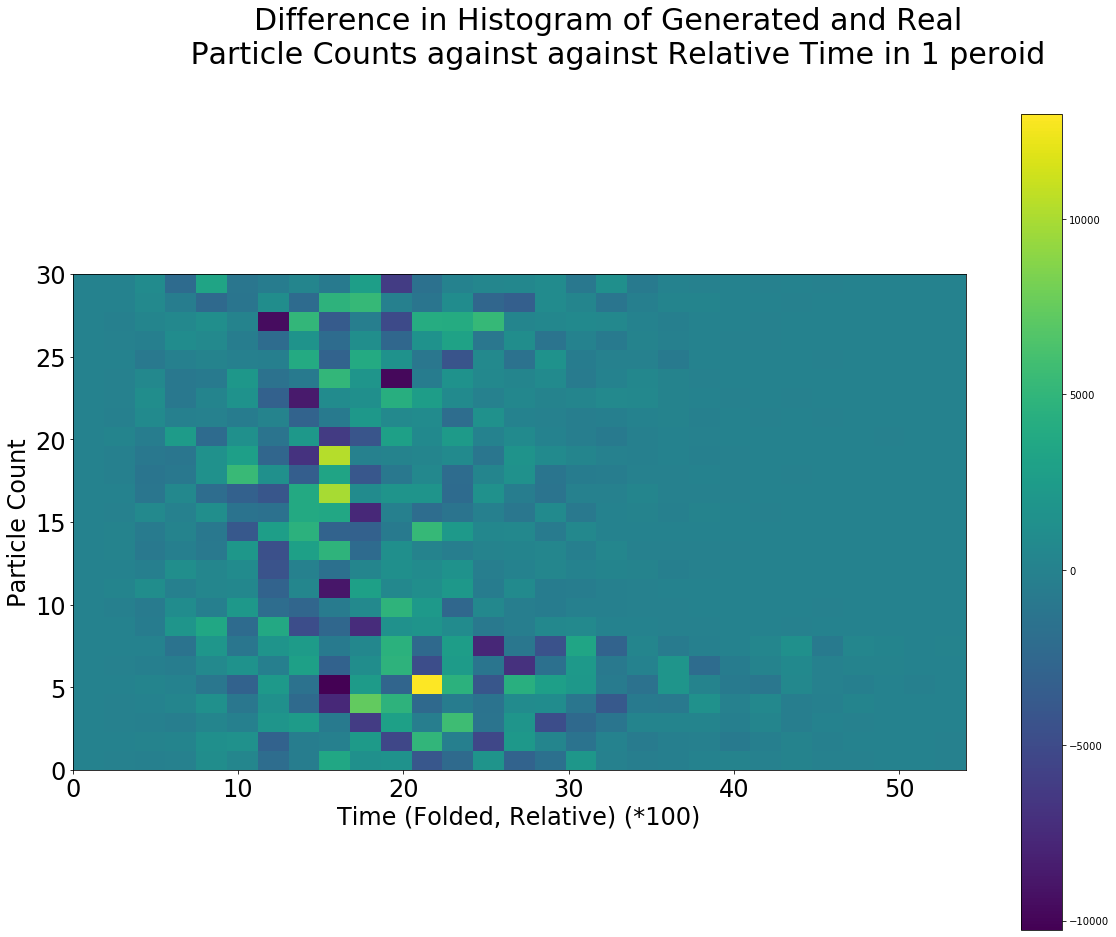

In [498]:
difference = model_pc_1period[0] - pc_1period[0]
plt.suptitle('Difference in Histogram of Generated and Real \n Particle Counts against against Relative Time in 1 peroid', fontsize=30)
plt.xlabel('Time (Folded, Relative) (*100)', fontsize = 24)
plt.ylabel('Particle Count', fontsize = 24)
plt.tick_params(labelsize = 24)
plt.imshow(difference, extent = [0, 54, 0,30])
plt.colorbar()

In [499]:
max_error = (max(np.abs(difference.flatten())))
print(max_error)
print(max_error / len(data[3,:]))

12980.0
0.0005007715856183802


Again, we only have a 0.05% difference between model and real data.
<br>**Our Model has done a good job recreating the background**.

## 4

We already have our model, which gives us an average for the PDF of the Poisson distribution at any given time.
<br>With PDF already known, we will directly know what the 5-sigma threashold is for every time instance.

In [205]:
sigma_5 = stats.norm.sf(5, loc=0, scale=1)
sigma_5

2.866515718791933e-07

In [209]:
# We generalize the sigma-finding process into a function.
def find_5_sigma(i):
    print("You requested to find the '5-sigma' threashold at time " + str(i * 0.1 + data[0,0]) + ' seconds.')
    mean = mean_fit(i * 0.1)
    # return mean
    print("This time corresponds to a mean of " + str(mean) + '.')
    threashold = stats.poisson.isf(sigma_5, mu = mean, loc = 0)
    print("The 5-sigma' threashold at time " + str(i * 0.1 + data[0,0]) + " seconds is " + str(threashold))
    return threashold

Let's try out some values.

In [210]:
find_5_sigma(0)

You requested to find the '5-sigma' threashold at time 940680016.0 seconds.
This time corresponds to a mean of 7.79545759478677.
The 5-sigma' threashold at time 940680016.0 seconds is 25.0


25.0

In [211]:
find_5_sigma(20000)

You requested to find the '5-sigma' threashold at time 940682016.0 seconds.
This time corresponds to a mean of 6.175796393965243.
The 5-sigma' threashold at time 940682016.0 seconds is 22.0


22.0

In [212]:
find_5_sigma(40000)

You requested to find the '5-sigma' threashold at time 940684016.0 seconds.
This time corresponds to a mean of 5.807032111654998.
The 5-sigma' threashold at time 940684016.0 seconds is 21.0


21.0

To generalize the examples, let's plot the 5-sigma threashold vs time within a peroid as a plot.

In [236]:
# redefine the function, without unnessesary prints
def find_5_sigma(i):
    mean = mean_fit(i * 0.1)
    threashold = stats.poisson.isf(sigma_5, mu = mean, loc = 0)
    return threashold

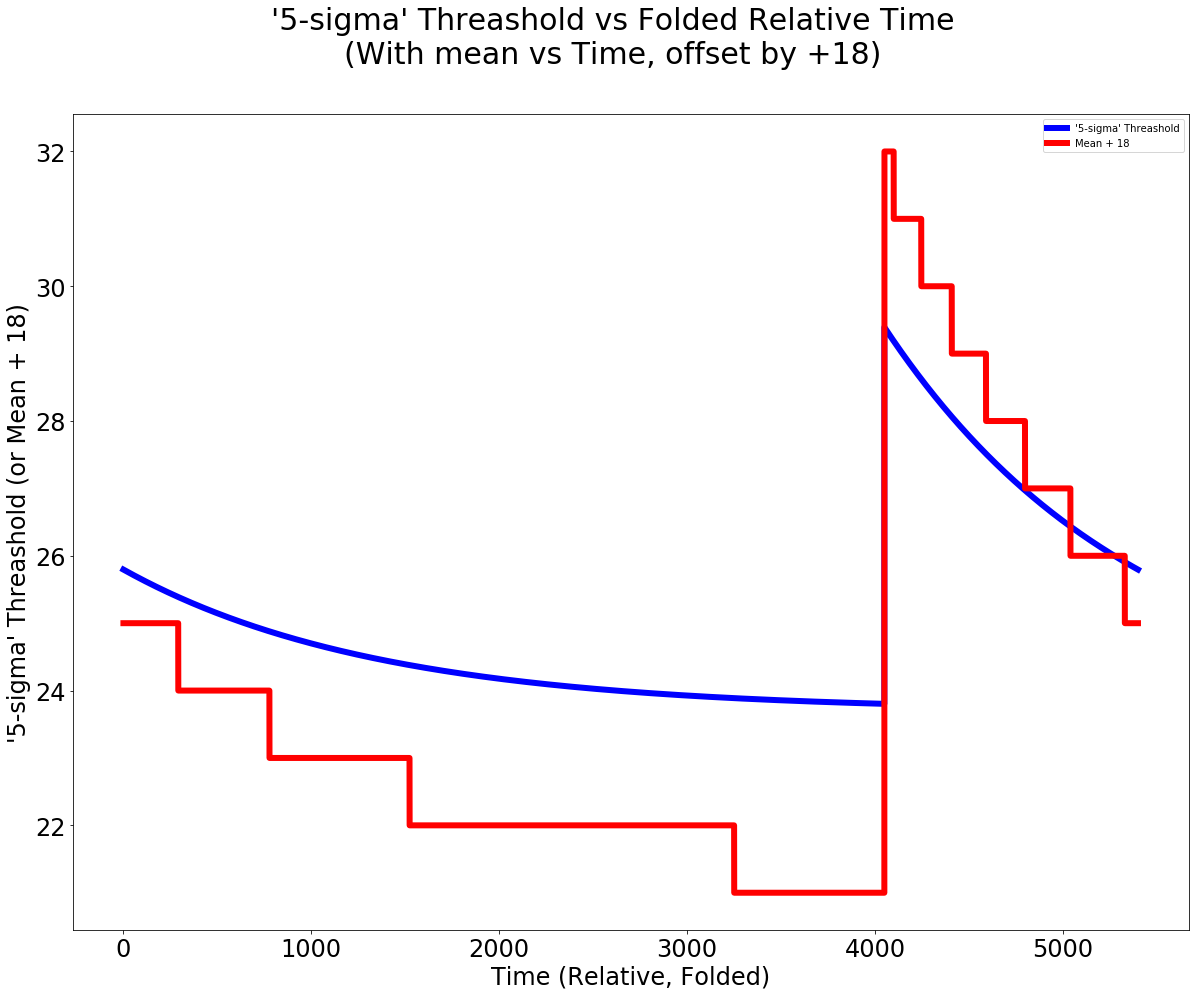

In [237]:
plt.suptitle("'5-sigma' Threashold vs Folded Relative Time\n(With mean vs Time, offset by +18)", fontsize = 30)
plt.xlabel('Time (Relative, Folded)', fontsize = 24)
plt.ylabel("'5-sigma' Threashold (or Mean + 18)", fontsize = 24)
plt.tick_params(labelsize = 24)
x = time_fold[0:54000]
plt.plot(x, mean_fit(x) + 18, color = 'blue', linewidth = 6, label = "'5-sigma' Threashold")
plt.plot(x, find_5_sigma(x * 10), color = 'red', linewidth = 6, label = "Mean + 18")
plt.legend()
plt.show()

## Part 5 (Optional)

We want to know what causes the variable background.

Since the Gamma-ray detecting Satellite is capable of detecting various cosmic rays (which forms the background), it is suspected that **Solar Phase** might be influencing the background change.

/opt/conda/lib/python3.7/site-packages/IPython/core/pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


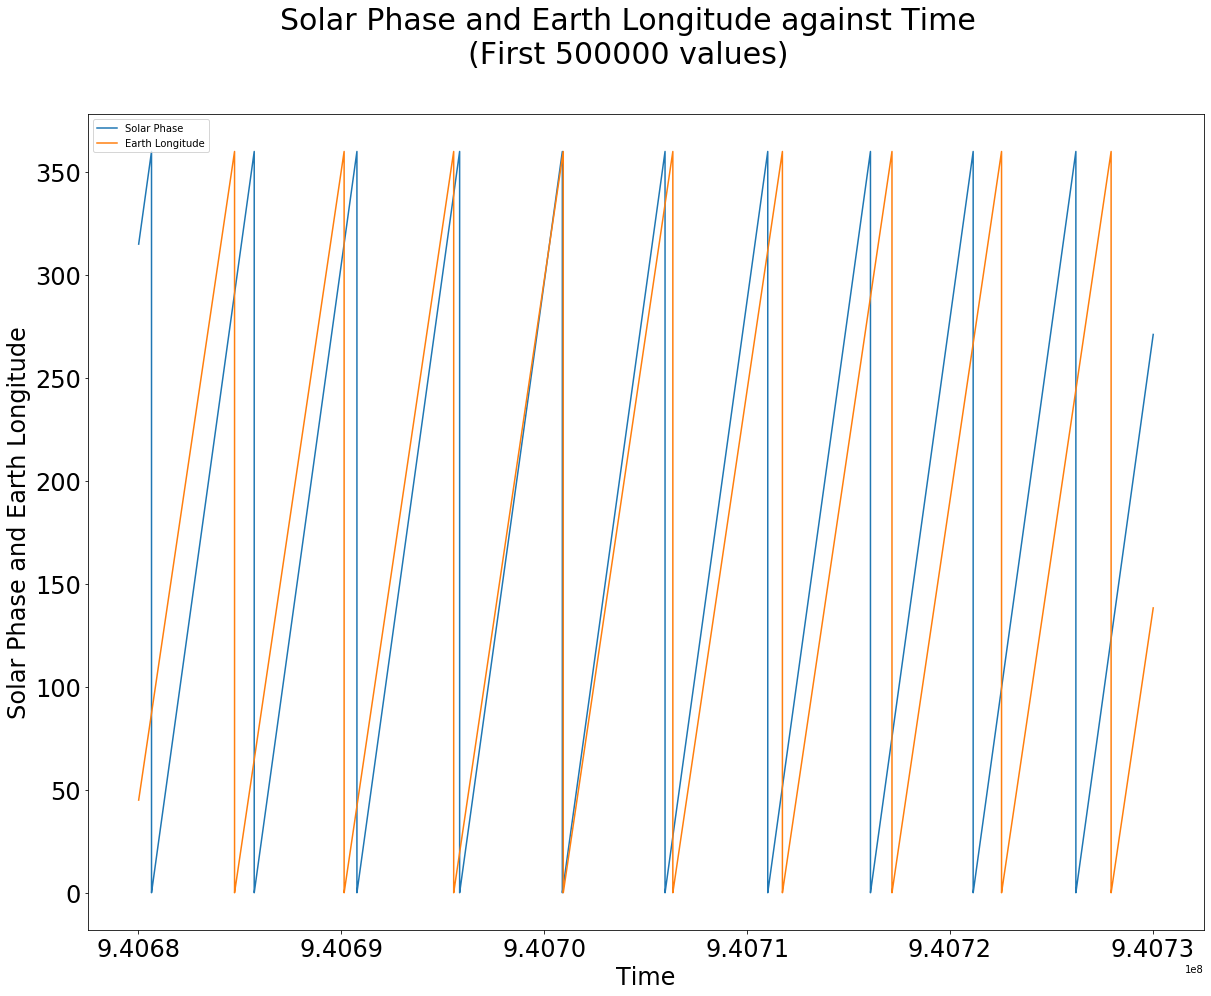

In [253]:
plt.suptitle('Solar Phase and Earth Longitude against Time\n(First 500000 values)', fontsize=30)
plt.xlabel('Time', fontsize = 24)
plt.ylabel('Solar Phase and Earth Longitude', fontsize = 24)
plt.tick_params(labelsize = 24)
plt.plot(data[0,0:500000], data[1,0:500000], label  = 'Solar Phase')
plt.plot(data[0,0:500000], data[2,0:500000], label  = 'Earth Longitude')
plt.legend()
plt.show()

It appears that while Solar Phase is also peroidic vs time, it is slightly out of phase as compared to Earth Longitude, thus it becomes "averaged out' over 25 million datapoints, and the background appears to be constant with respect to Solar Phase.

Thus, the explanation falls onto Earth Longitude itself.

In [258]:
print(mean_fit(4050))
print(mean_fit(4050.1))
print(mean_fit(4050 + 5400))
print(mean_fit(4050.1 + 5400))

5.803083769075646
11.392098677521687
5.803083769075646
11.392098677521687


4050 Seconds after the data collection, the background mean suddenly spiked, then fall as a exponential until it spikes again 5400 seconds later.

In [262]:
print(data[2,40500])
print(data[2,40501])

315.0
315.0066666682561


The spike happens when the Satellite reaches Longitude 315 degrees, which corresponds to 45 degrees west(Greenland, Brazil).
<br> **Now I'm stuck. Need more ideas past this.**

# Problem 2

File Import:

In [269]:
hf = h5py.File('images.h5', 'r')
hf.keys()

<KeysViewHDF5 ['image1', 'imagestack']>

In [270]:
image1 = np.array(hf.get('image1'))


In [271]:
imagestack = np.array(hf.get('imagestack'))

In [272]:
hf.close()

In [500]:
print(max(image1.flatten()))
print(min(image1.flatten()))
print(max(imagestack.flatten()))
print(min(imagestack.flatten()))

46.84317561571535
-2.3061570283216652
47.79010819628649
-2.709336827866645


## 2)

First, we want to see what those images look like.

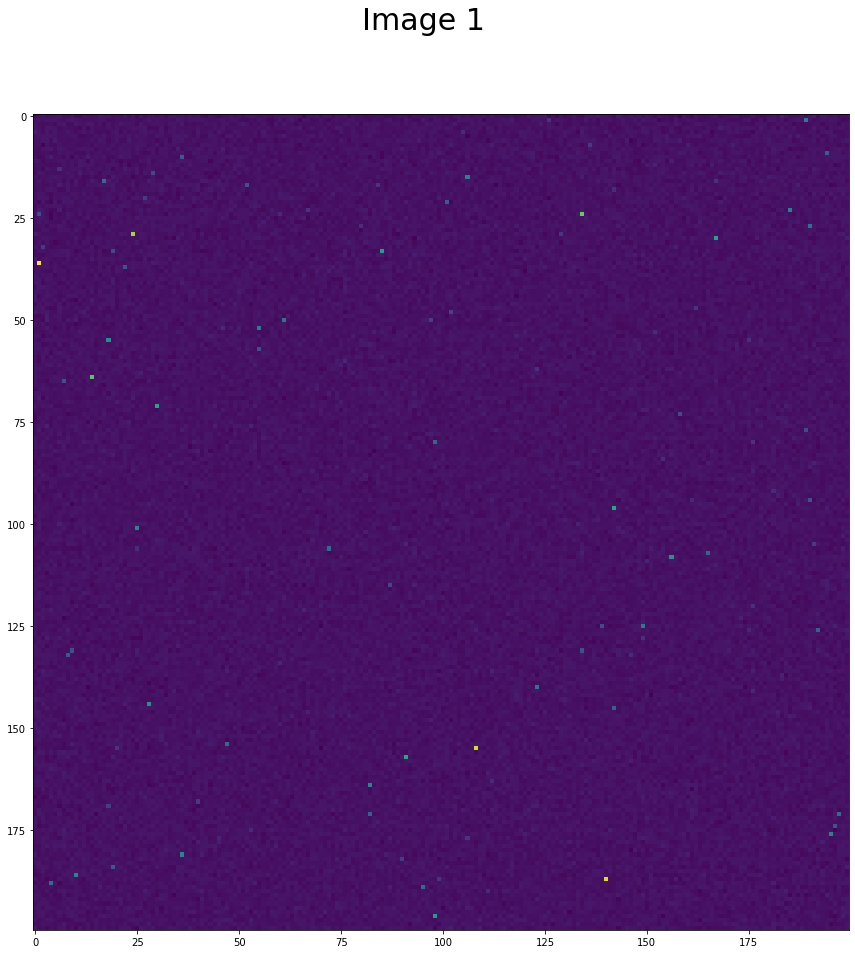

In [276]:
plt.suptitle('Image 1', fontsize=30)
plt.imshow(image1)
plt.show()

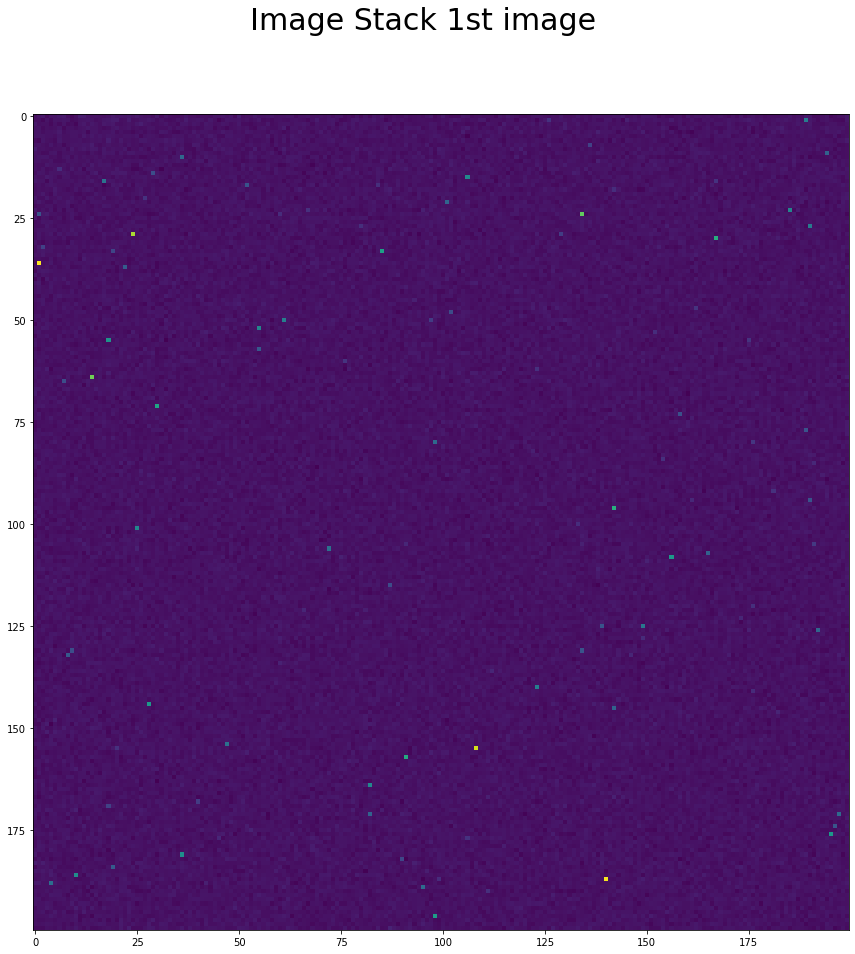

In [282]:
plt.suptitle('Image Stack 1st image', fontsize=30)
plt.imshow(imagestack[:,:,0])
plt.show()

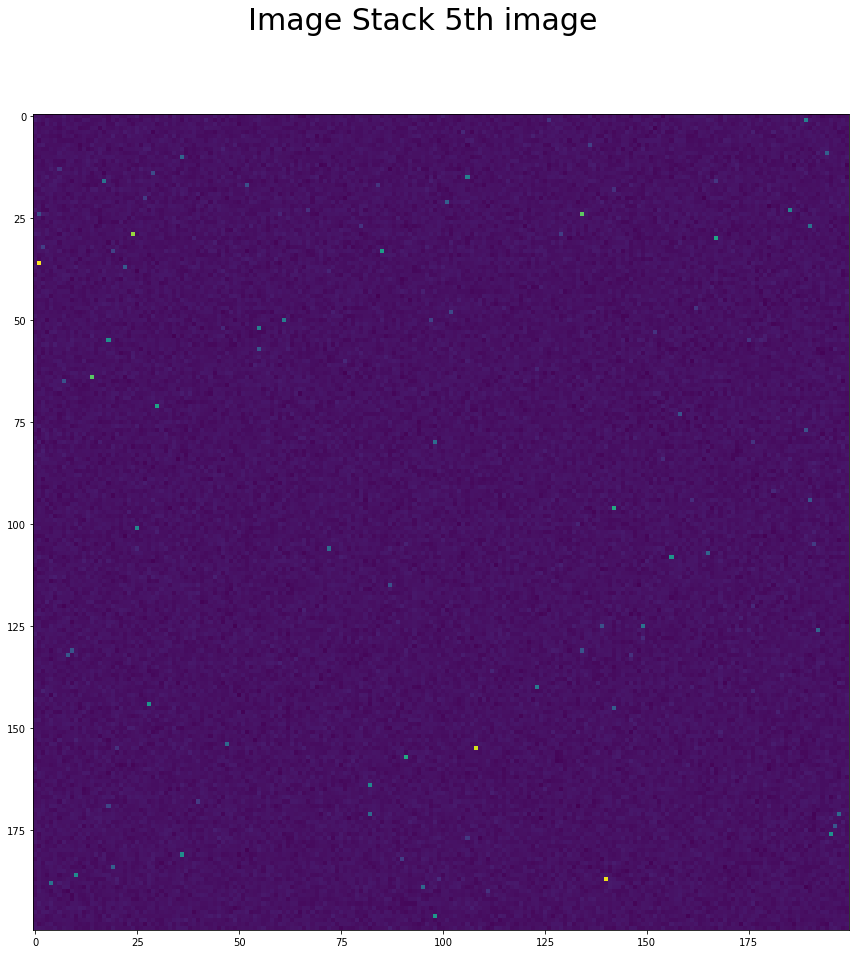

In [284]:
plt.suptitle('Image Stack 5th image', fontsize=30)
plt.imshow(imagestack[:,:,4])
plt.show()

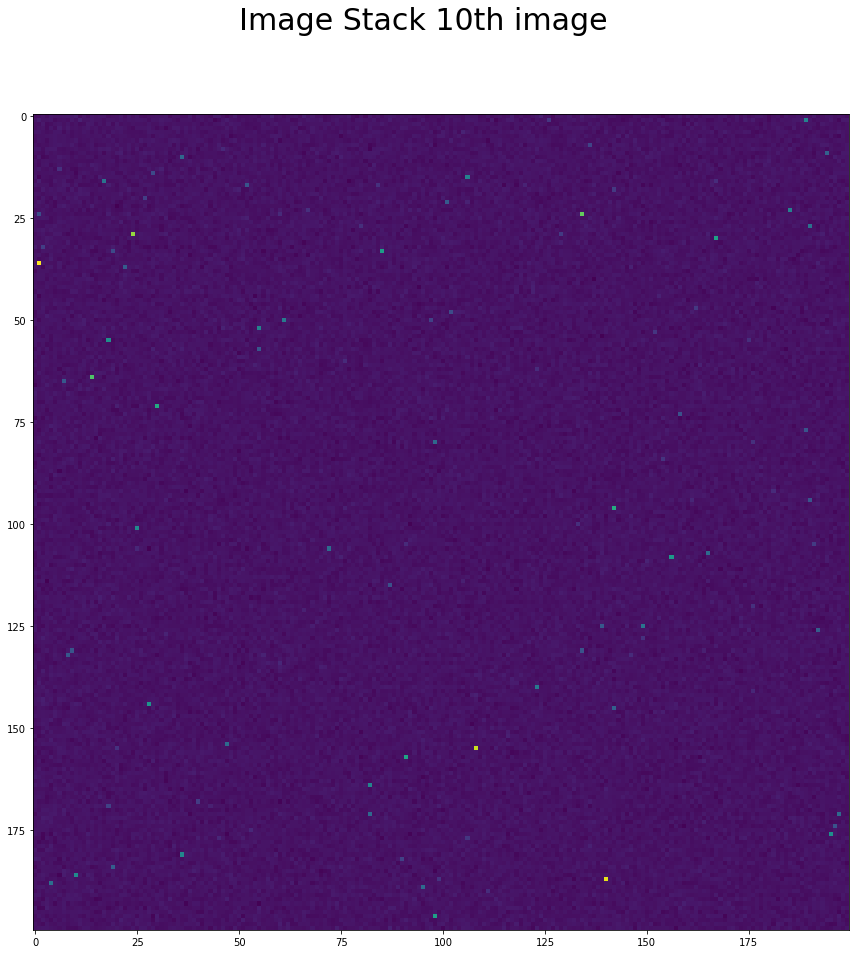

In [285]:
plt.suptitle('Image Stack 10th image', fontsize=30)
plt.imshow(imagestack[:,:,9])
plt.show()

From these snapshots, it appears that the background is just spatially uniform noise and there does not seem to be obvious traces of contamination.

To see the trend better, we'll plot 2D histograms of Pixel Brightness versus other parameters.

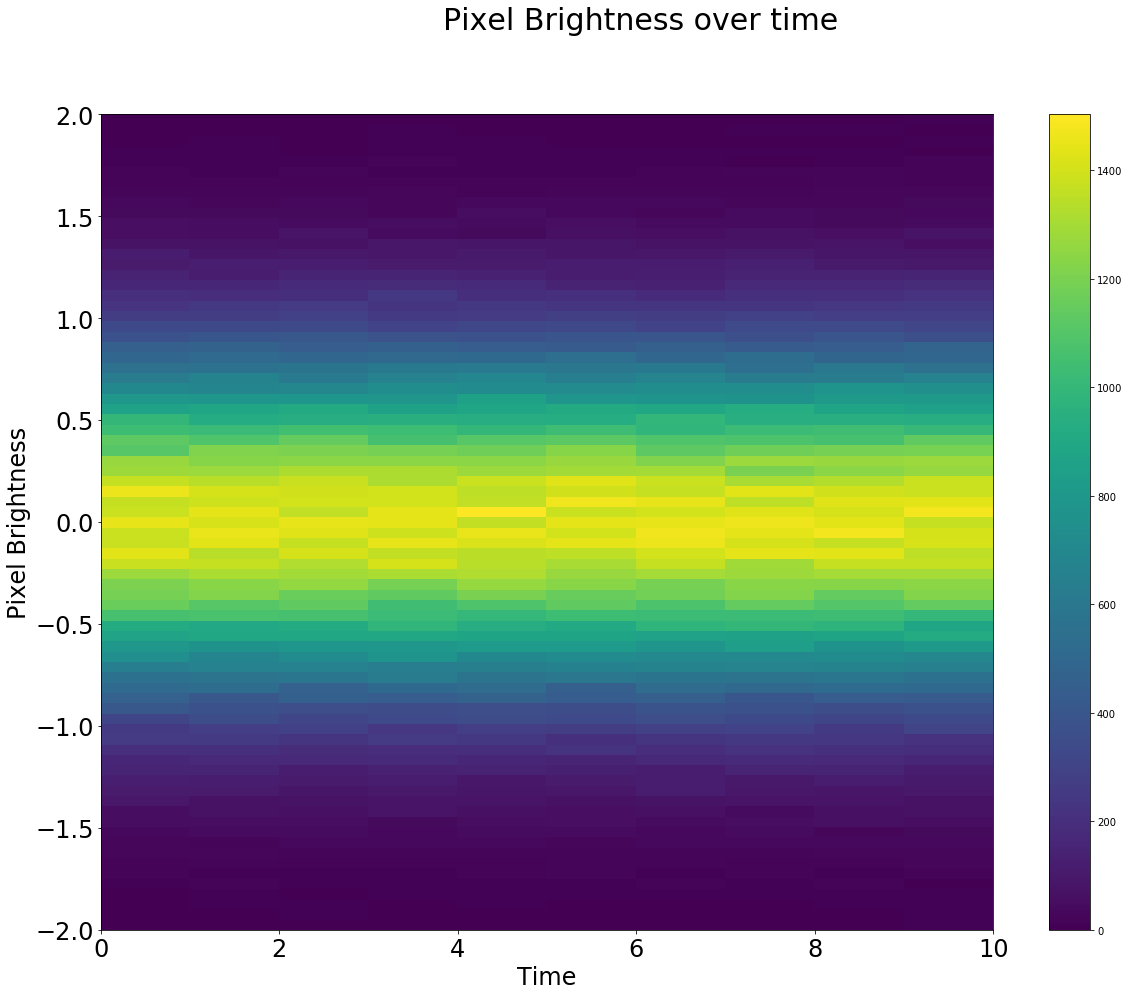

In [371]:
plt.suptitle('Pixel Brightness over time', fontsize=30)
plt.xlabel('Time', fontsize = 24)
plt.ylabel('Pixel Brightness', fontsize = 24)
plt.tick_params(labelsize = 24)
binx = np.arange(0,11)
biny = np.linspace(-2,2,80)
x = np.zeros(10 * 200 * 200)
y = np.zeros(10 * 200 * 200)
for k in np.arange(0, 10):
    x[40000 * k: 40000 * (k + 1)] = np.ones(40000) * k
    y[40000 * k: 40000 * (k + 1)] = imagestack[:,:,k].flatten()
plt.hist2d(x, y,  bins = [binx, biny])
plt.colorbar()
plt.show()

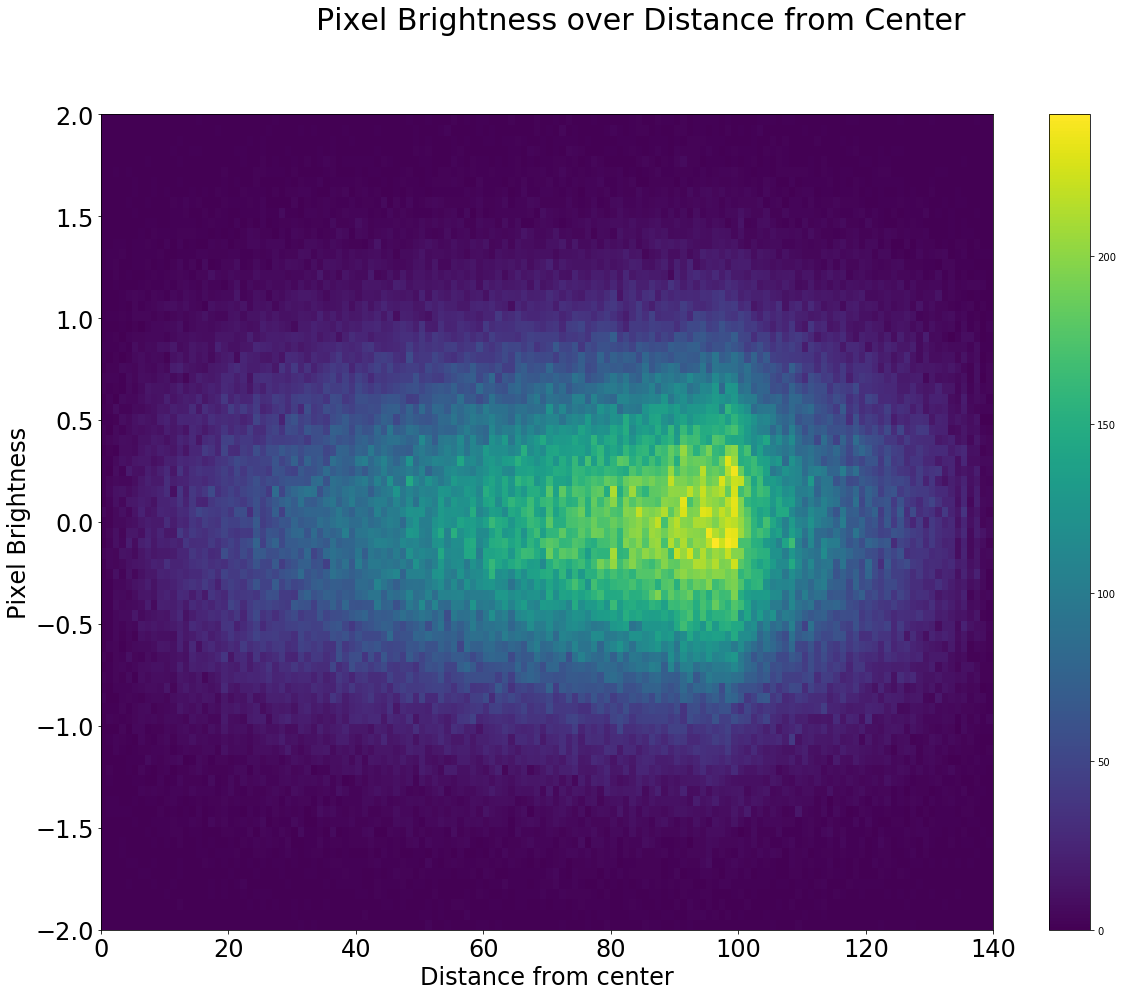

In [374]:
plt.suptitle('Pixel Brightness over Distance from Center', fontsize=30)
plt.xlabel('Distance from center', fontsize = 24)
plt.ylabel('Pixel Brightness', fontsize = 24)
plt.tick_params(labelsize = 24)
binx = np.arange(0,141)
biny = np.linspace(-2,2,80)
x = np.zeros(10 * 200 * 200)
y = np.zeros(10 * 200 * 200)
for i in np.arange(0, 200):
    for j in np.arange(0, 200):
        x[10*(200*i+j): 10 * (200*i+j+1)] = np.ones(10) * np.sqrt((99.5-i) ** 2 + (99.5-j) ** 2)
        y[10*(200*i+j): 10 * (200*i+j+1)] = imagestack[i,j,:]
plt.hist2d(x, y,  bins = [binx, biny])
plt.colorbar()
plt.show()

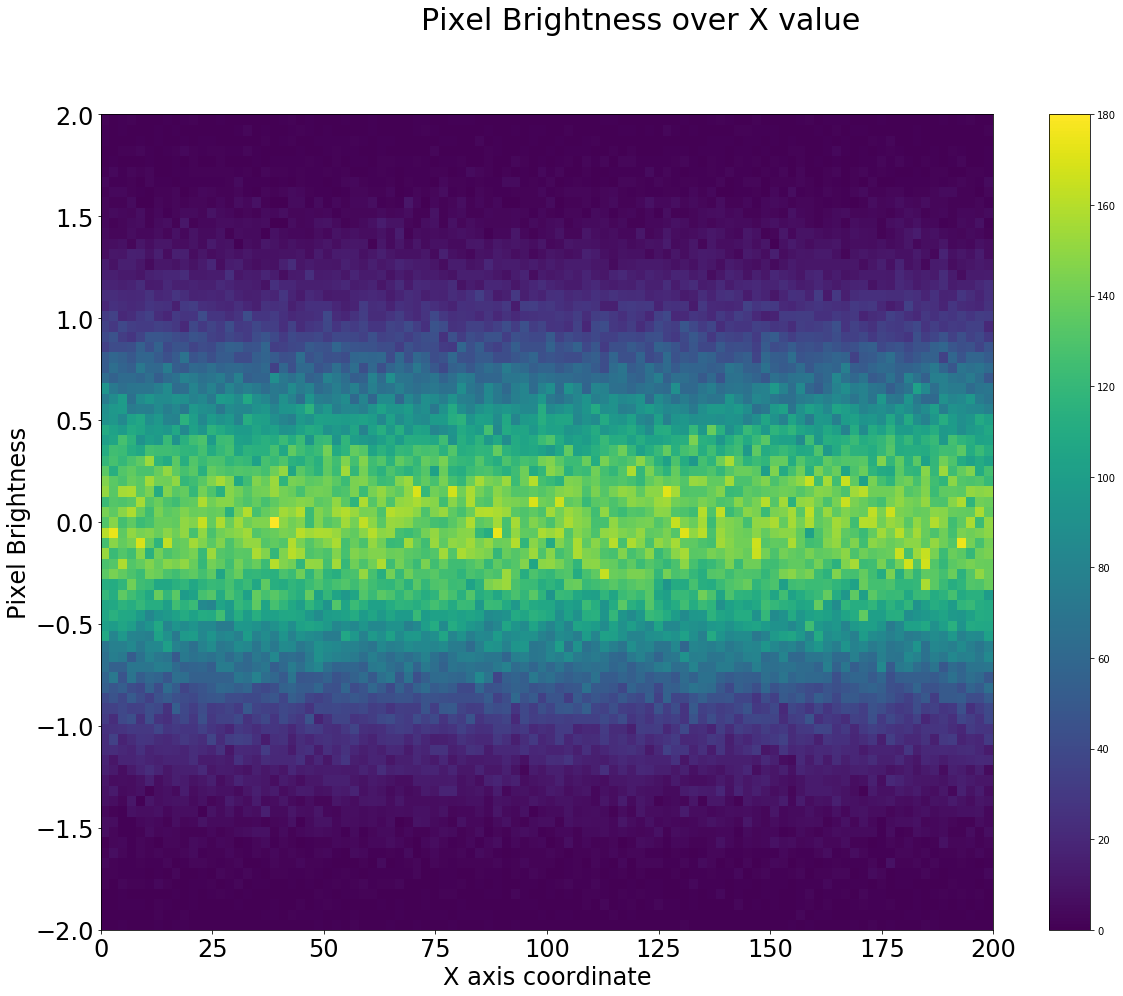

In [372]:
plt.suptitle('Pixel Brightness over X value', fontsize=30)
plt.xlabel('X axis coordinate', fontsize = 24)
plt.ylabel('Pixel Brightness', fontsize = 24)
plt.tick_params(labelsize = 24)
binx = np.arange(0,202,2)
biny = np.linspace(-2,2,80)
x = np.zeros(10 * 200 * 200)
y = np.zeros(10 * 200 * 200)
for i in np.arange(0, 200):
        x[2000* i: 2000*(i+1)] = np.ones(2000) * i
        y[2000* i: 2000*(i+1)] = imagestack[i,:,:].flatten()
plt.hist2d(x, y,  bins = [binx, biny])
plt.colorbar()
plt.show()

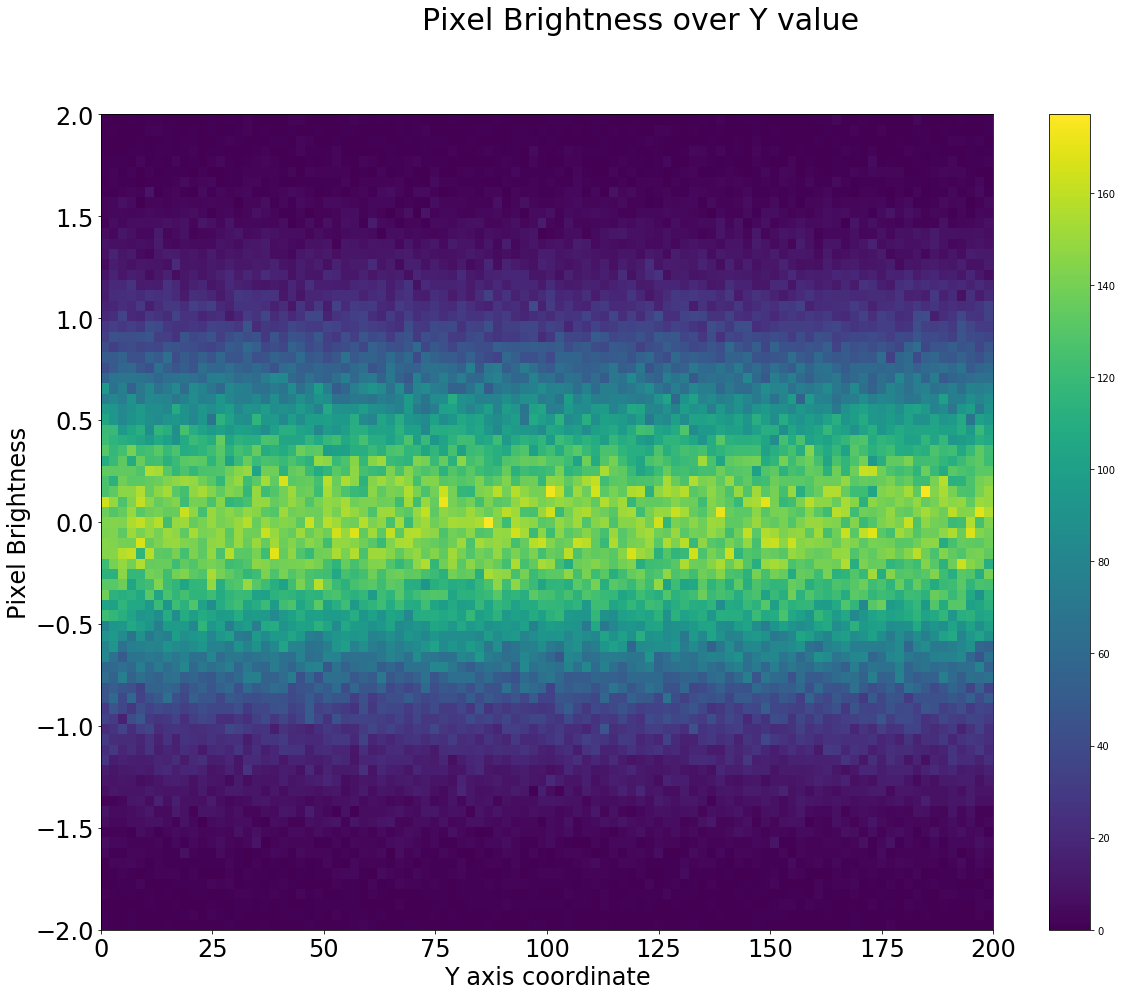

In [373]:
plt.suptitle('Pixel Brightness over Y value', fontsize=30)
plt.xlabel('Y axis coordinate', fontsize = 24)
plt.ylabel('Pixel Brightness', fontsize = 24)
plt.tick_params(labelsize = 24)
binx = np.arange(0,202,2)
biny = np.linspace(-2,2,80)
x = np.zeros(10 * 200 * 200)
y = np.zeros(10 * 200 * 200)
for j in np.arange(0, 200):
        x[2000* j: 2000*(j+1)] =  np.ones(2000) * j
        y[2000* j: 2000*(j+1)] = imagestack[:,j,:].flatten()
plt.hist2d(x, y,  bins = [binx, biny])
plt.colorbar()
plt.show()

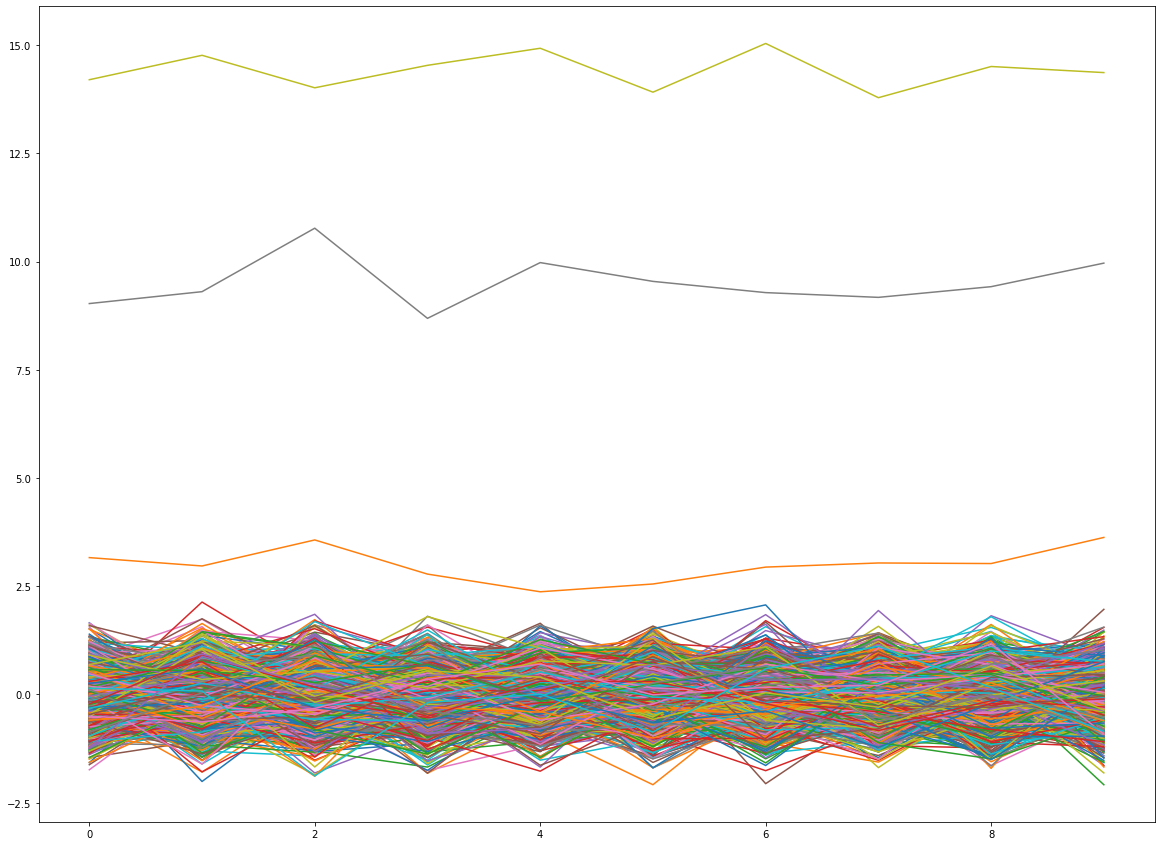

In [309]:
#x = np.arange(0, 10 * 200 * 200) % 10
#y = np.zeros(10 * 200 * 200)
for i in np.arange(80, 120):
    for j in np.arange(80, 120):
        plt.plot(np.arange(0,10),imagestack[i,j,:])

In [314]:
for i in np.arange(0, 200):
    for j in np.arange(0, 200):
        for k in np.arange(0,9):
            if abs(imagestack[i,j,k + 1] - imagestack[i,j,k]) >= 3:
                print(str(i),str(j),str(k), imagestack[i,j,k + 1] - imagestack[i,j,k])

0 127 8 -3.0742485028369693
2 12 6 3.3627075722733935
4 177 2 3.308865423466888
9 153 5 -4.070322412287277
15 66 1 3.047329184469328
18 87 0 -3.097543593245447
21 182 5 -3.158843441565349
25 39 5 -3.107450456993985
26 147 7 -3.2869107022848736
40 6 6 -3.2103253991654226
42 126 7 3.0581263552401214
43 24 7 -3.261883212816249
43 95 4 -3.0867372800260346
45 42 0 3.030968557086552
45 62 2 -3.091805201065281
48 105 8 3.106036279799264
49 123 6 3.068370129241897
51 148 2 -4.168097285409303
52 140 4 -3.201821081412932
57 190 1 -3.188794937152031
62 172 2 -3.024745065771106
71 132 4 3.0434727419283862
76 26 6 3.818849193723553
80 10 3 3.394083444285802
83 74 1 -3.2755176676973763
92 129 2 -3.418129303039776
101 168 7 -3.0682948143540223
103 22 4 3.147813069507108
105 111 8 3.0569013564887846
107 196 6 3.2980047496459024
110 49 7 -3.0878627071052938
111 139 5 -3.5484938786854165
112 58 0 3.168874822282243
112 69 2 -3.2289774004522815
118 174 5 -3.3110098100160013
125 4 7 -3.05511563299222
125 1

In [321]:
np.all(np.ones(10) > np.zeros(10))


True

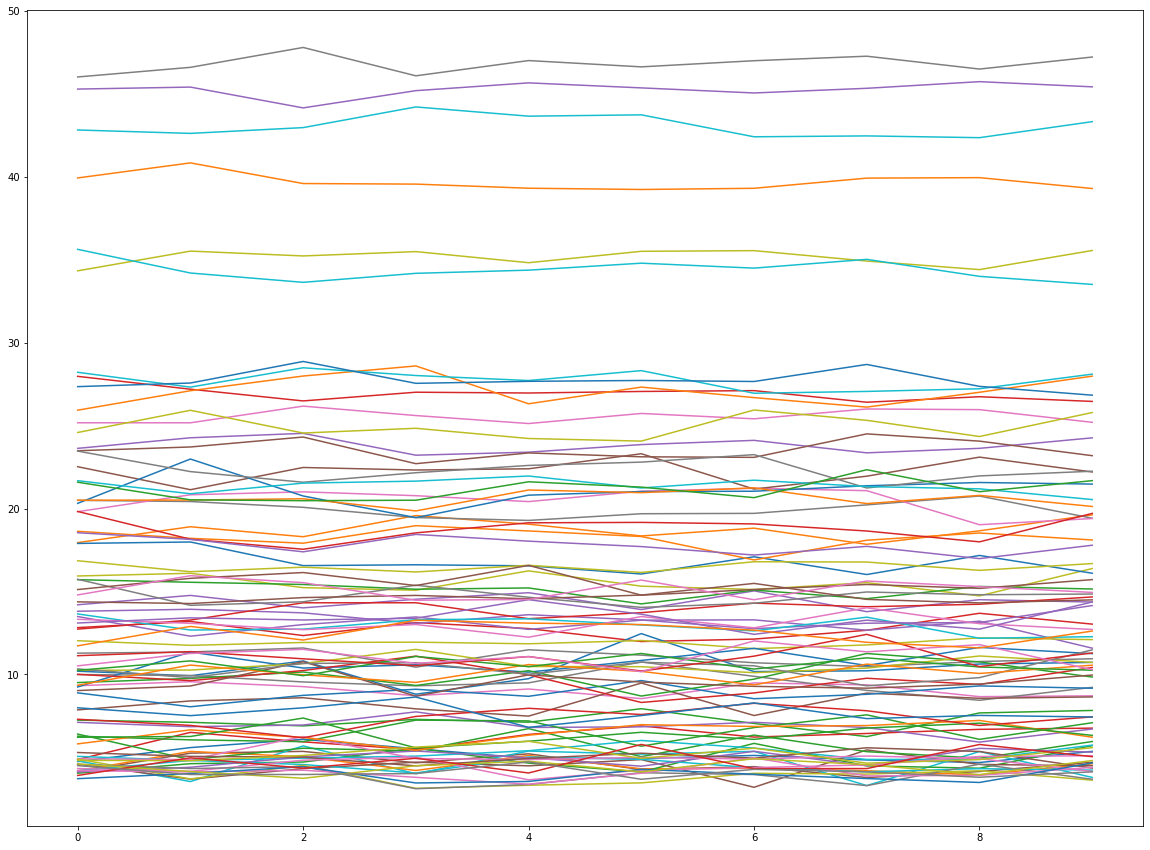

In [325]:
for i in np.arange(0, 200):
    for j in np.arange(0, 200):
        if np.all(imagestack[i,j,:] >= np.ones(10) * 3):
            #print(str(i),str(j))
            plt.plot(np.arange(10), imagestack[i,j,:])

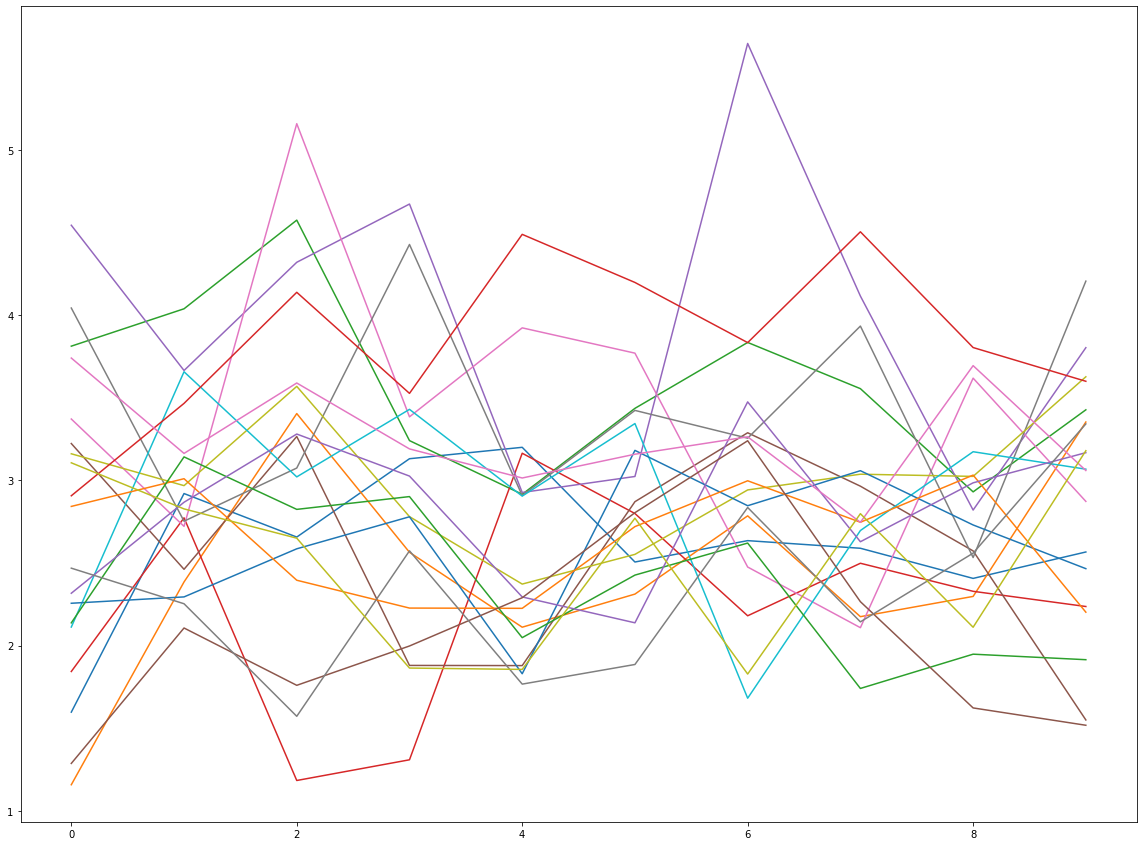

In [328]:
for i in np.arange(0, 200):
    for j in np.arange(0, 200):
        if (np.any(imagestack[i,j,:] < np.ones(10) * 3) & np.any(imagestack[i,j,:] >= np.ones(10) * 3)):
            #print(str(i),str(j))
            plt.plot(np.arange(10), imagestack[i,j,:])